In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
base_ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')

In [3]:
X = base_ordinal.drop(['SalePrice'], axis=1).values
y = base_ordinal.SalePrice.values

In [4]:
len(y)

2580

In [5]:
X.shape

(2580, 82)

In [6]:
X.shape[1]

82

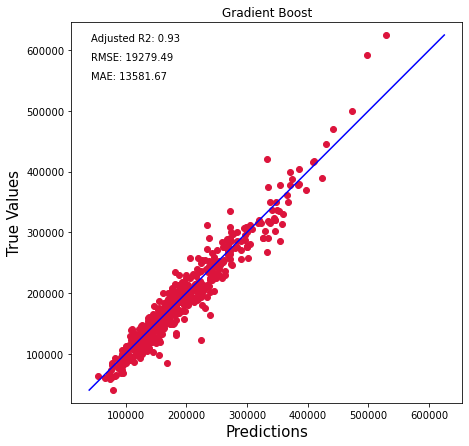

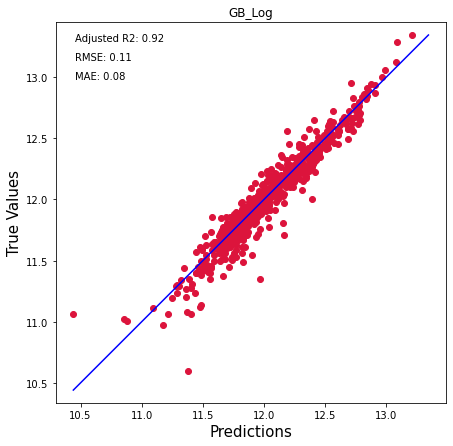

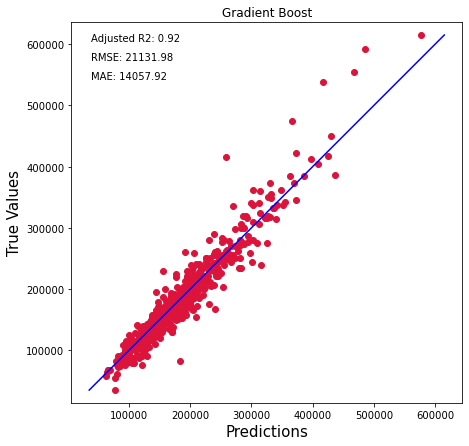

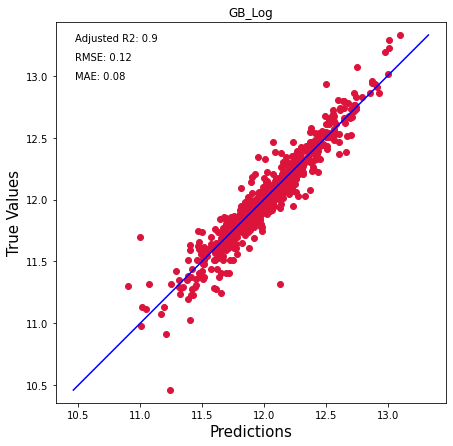

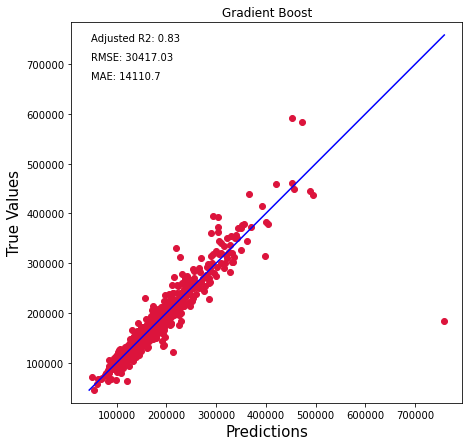

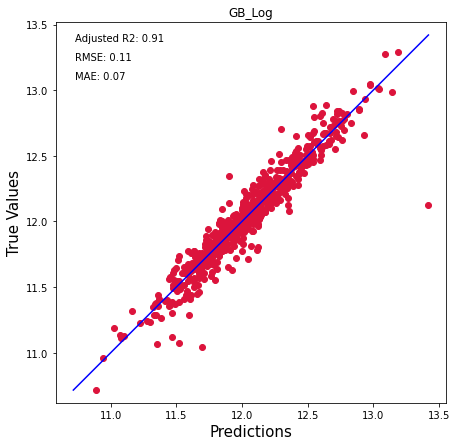

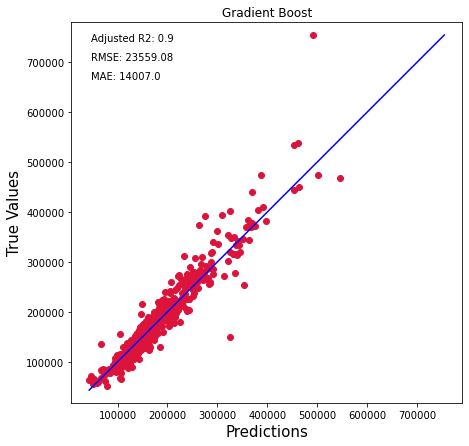

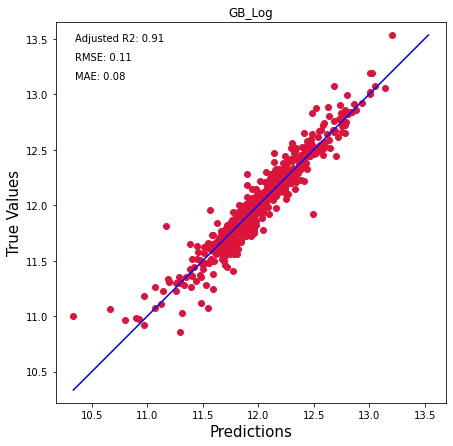

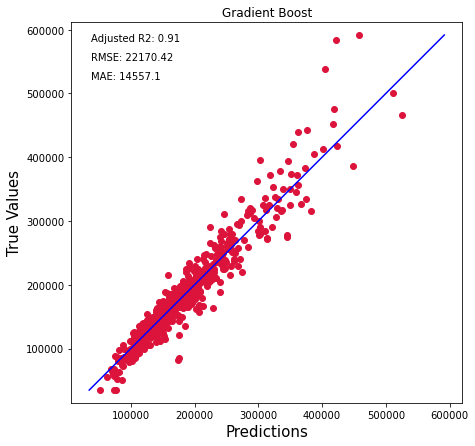

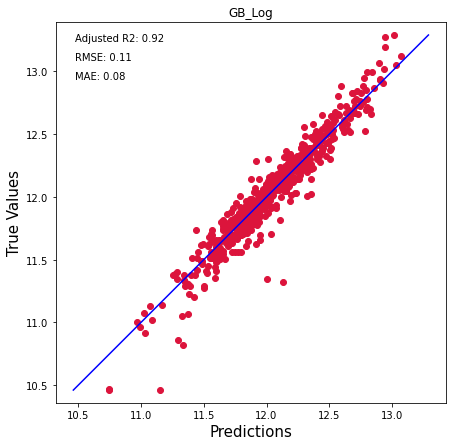

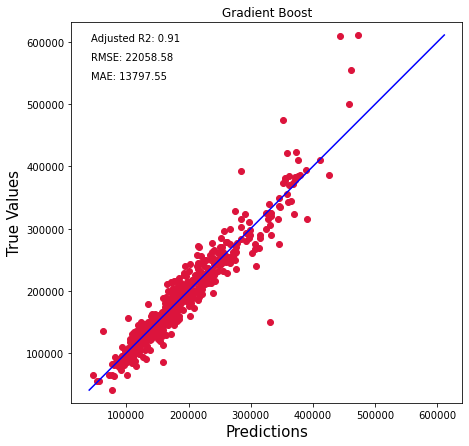

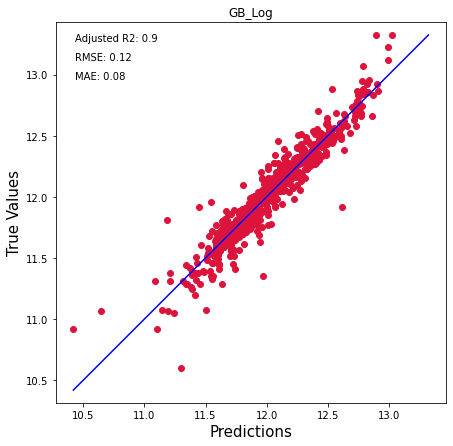

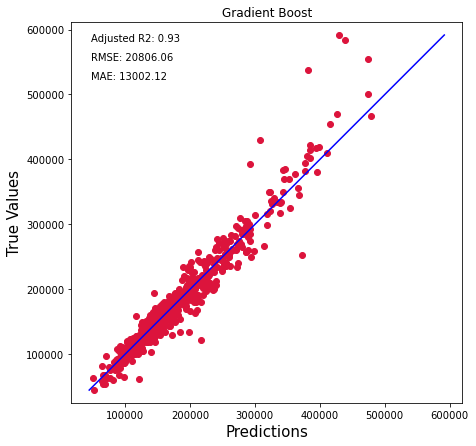

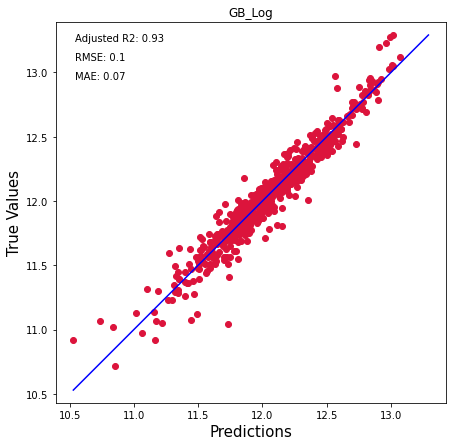

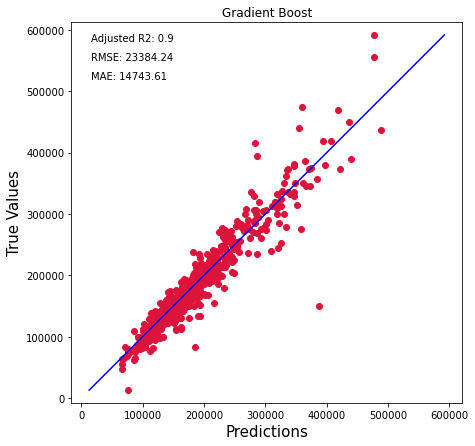

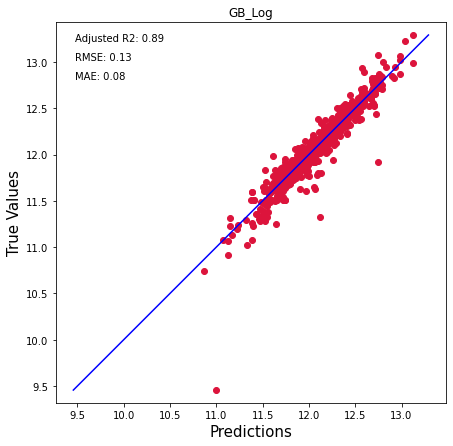

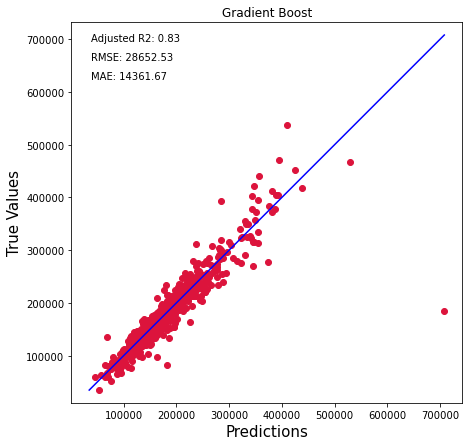

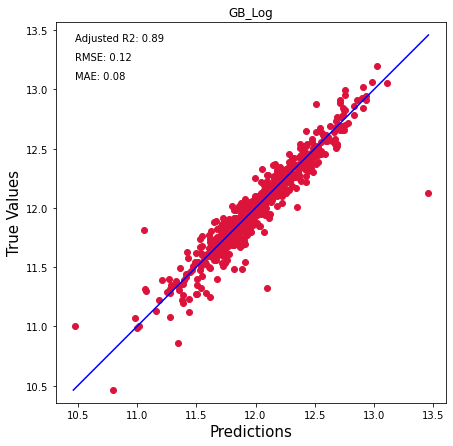

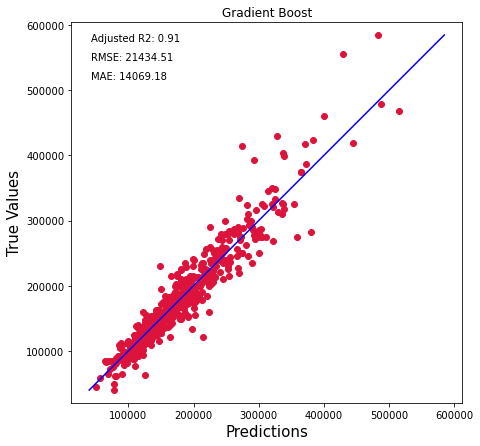

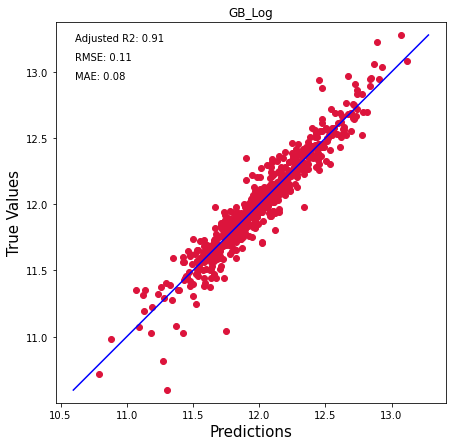

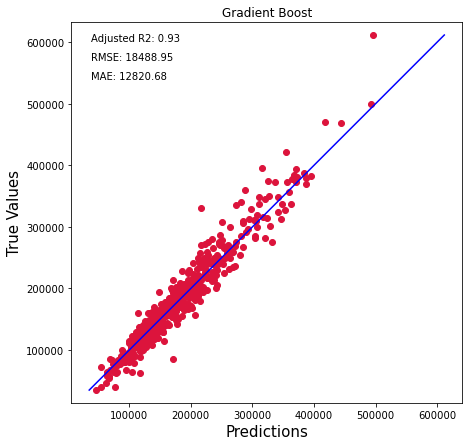

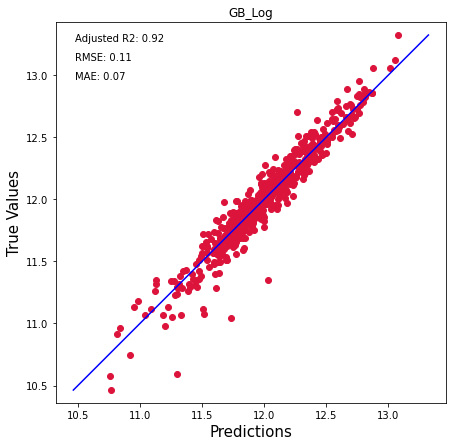

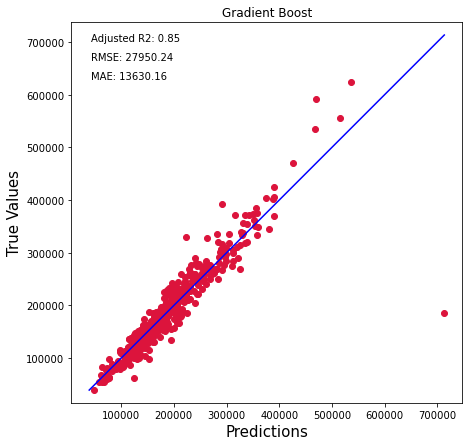

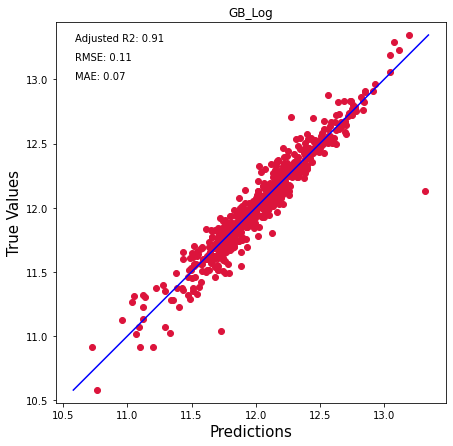

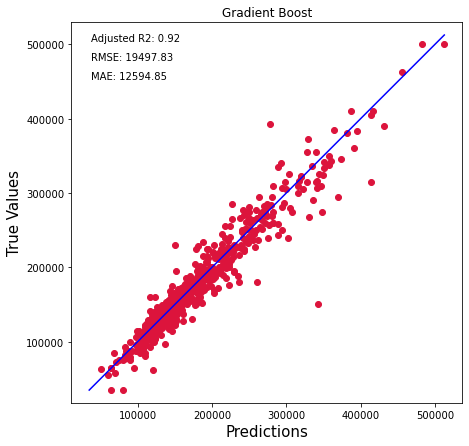

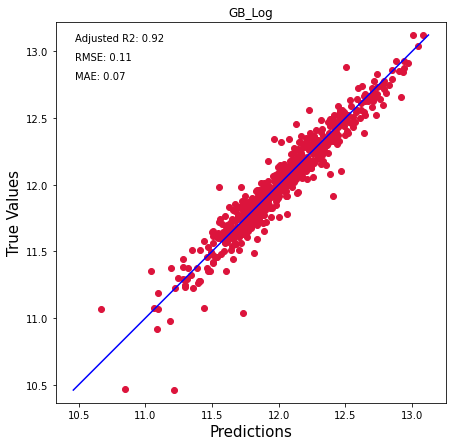

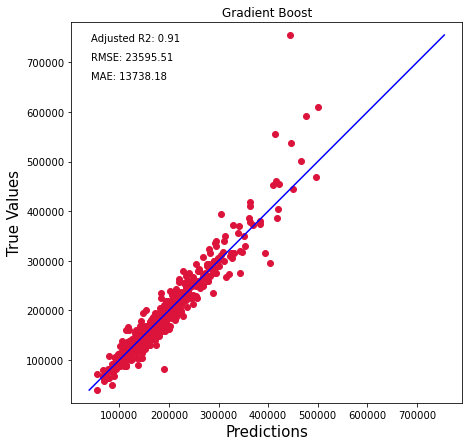

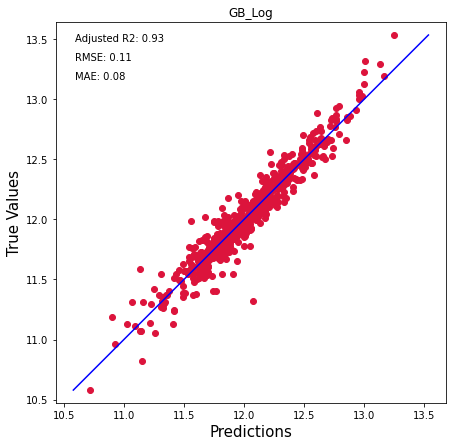

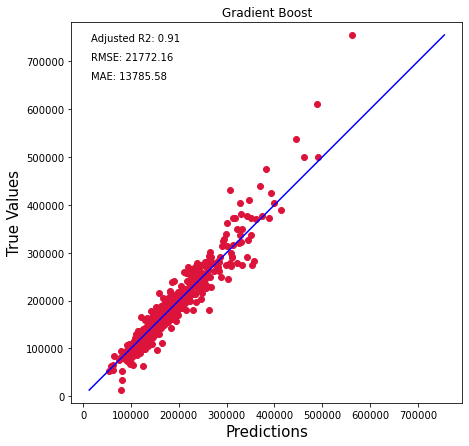

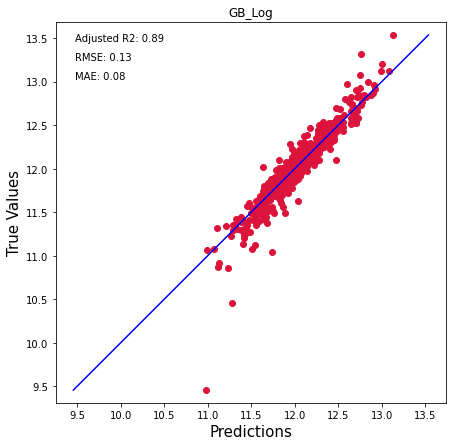

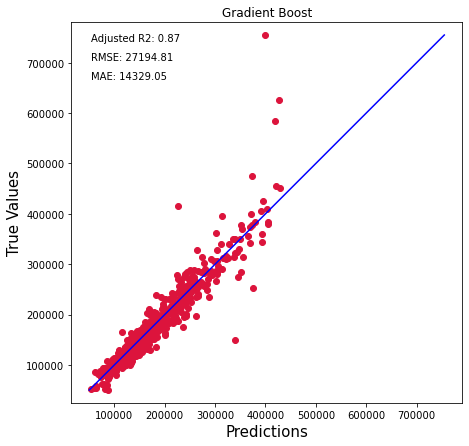

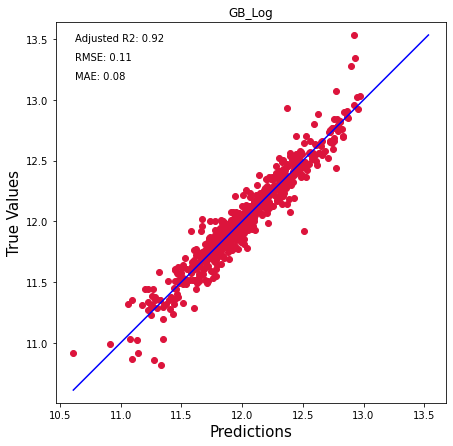

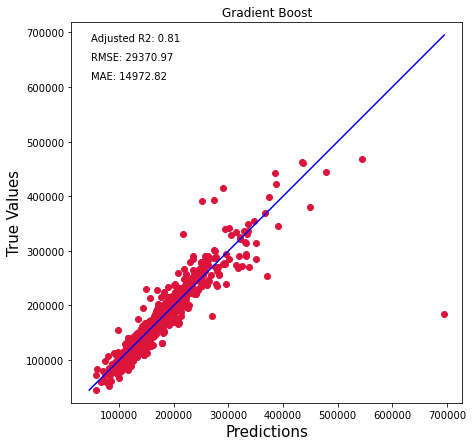

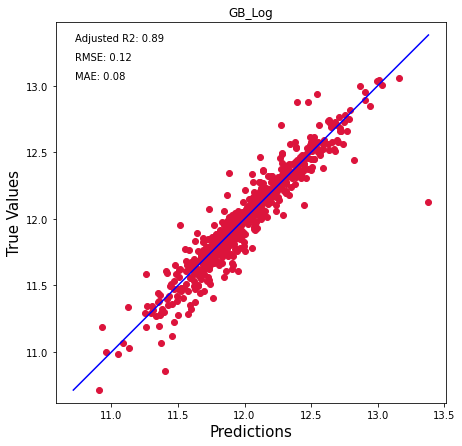

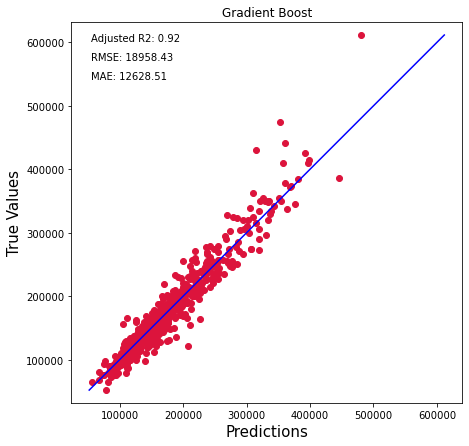

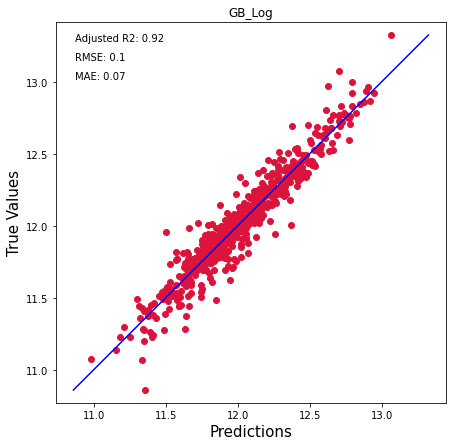

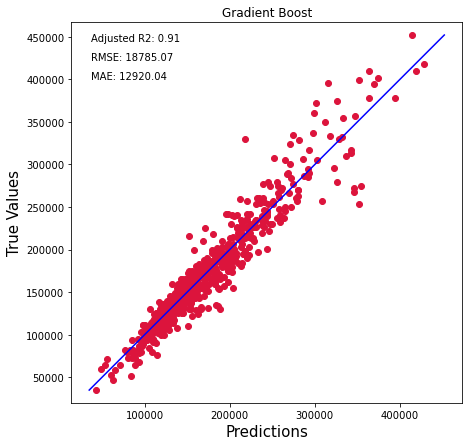

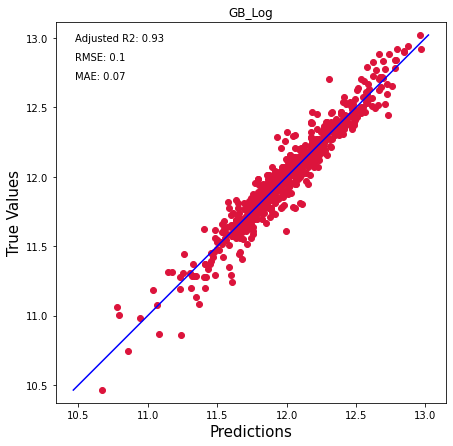

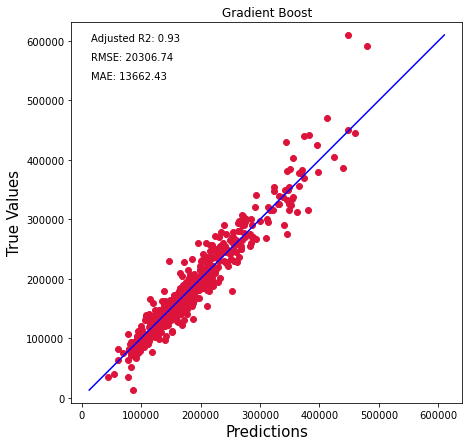

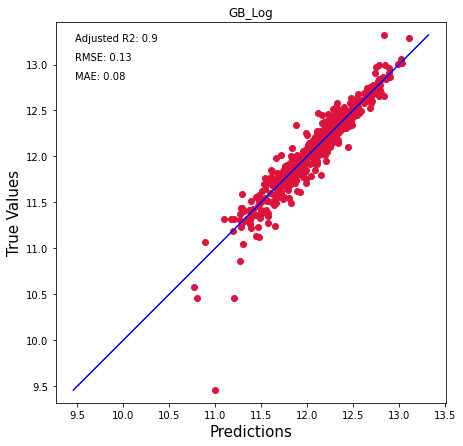

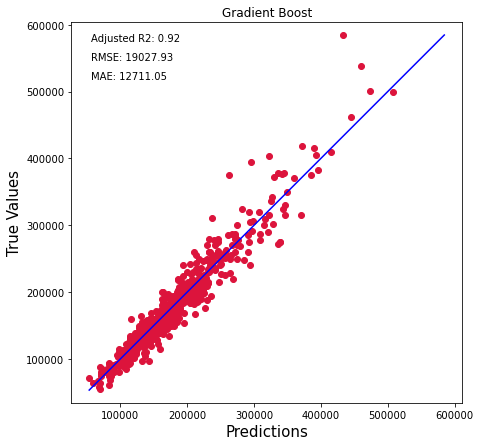

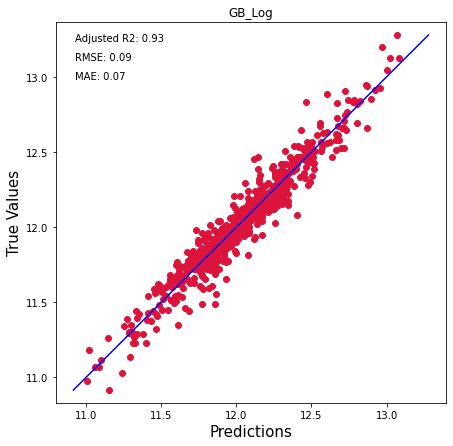

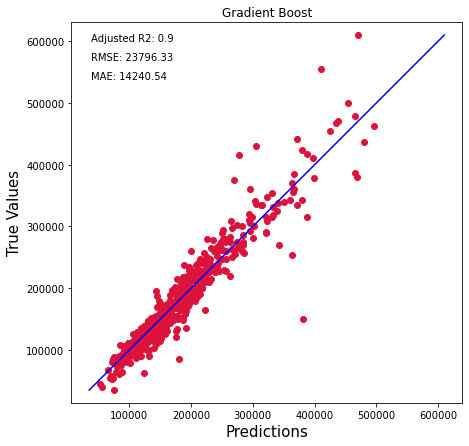

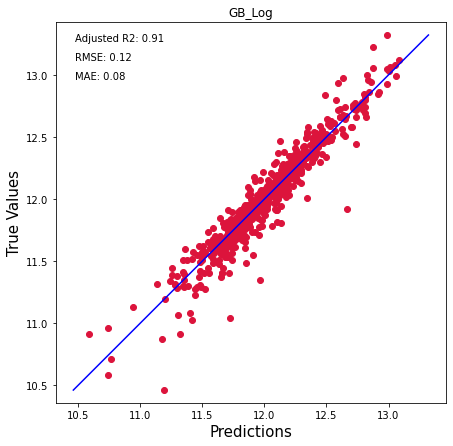

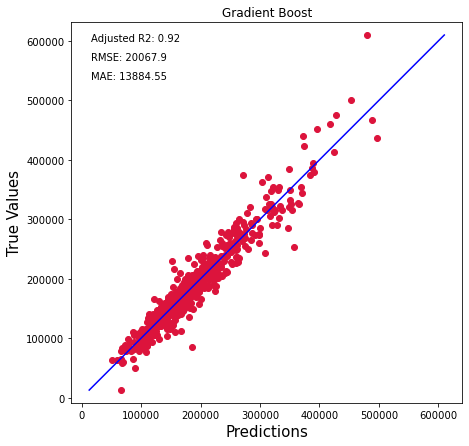

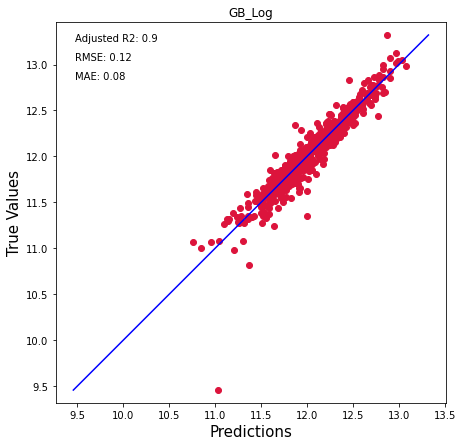

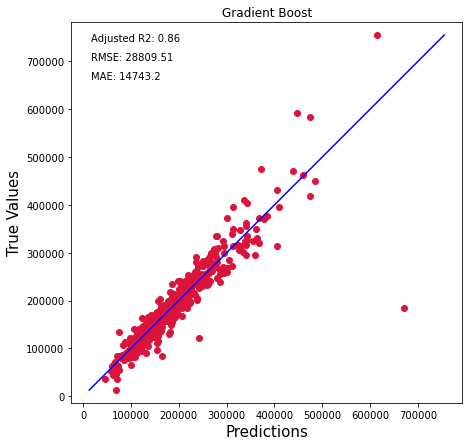

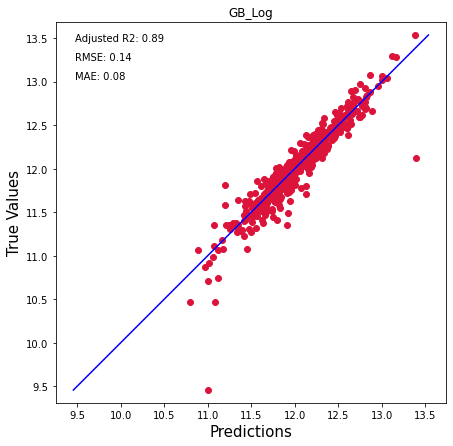

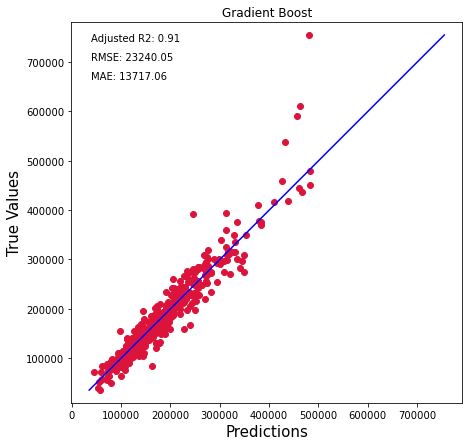

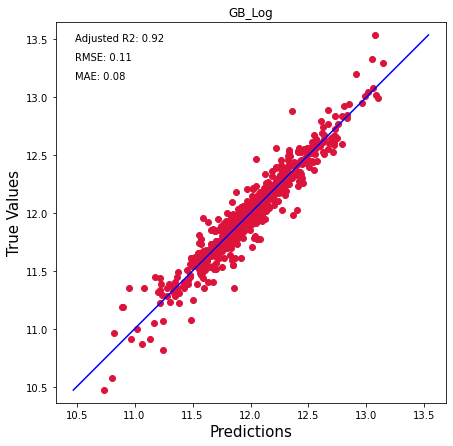

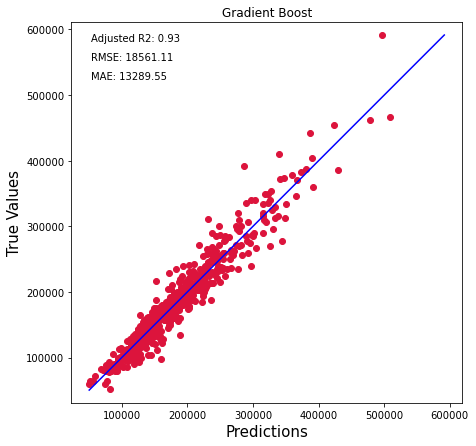

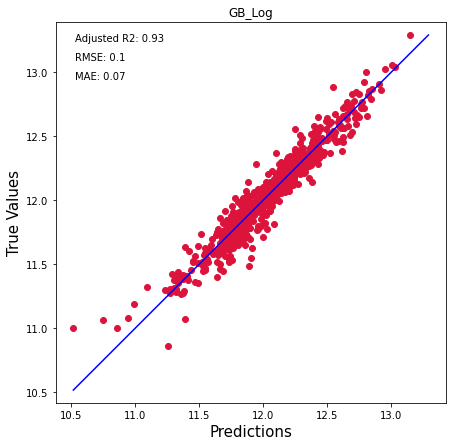

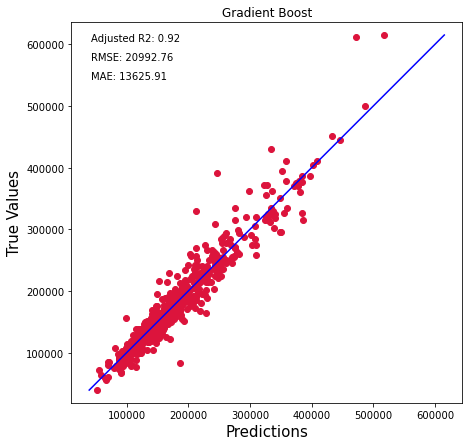

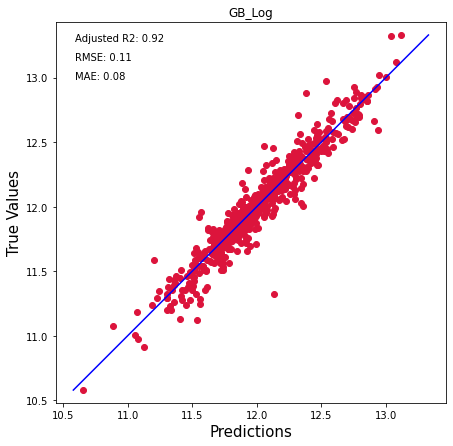

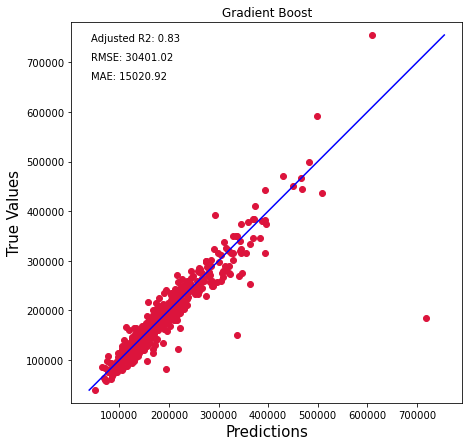

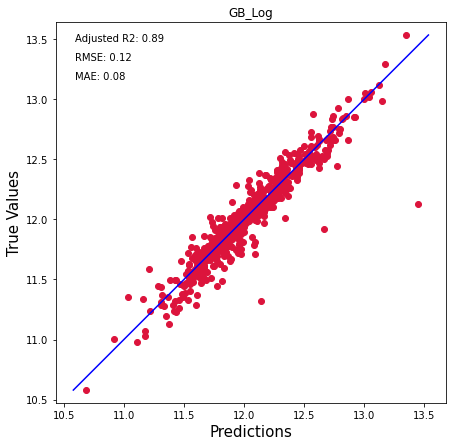

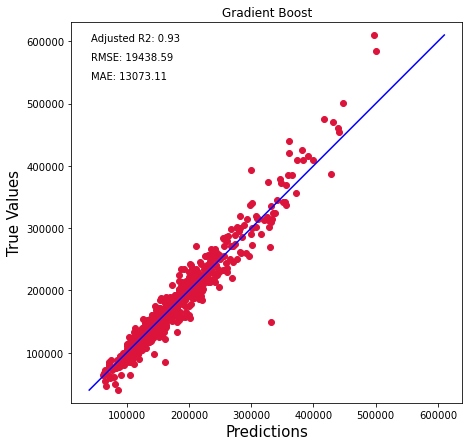

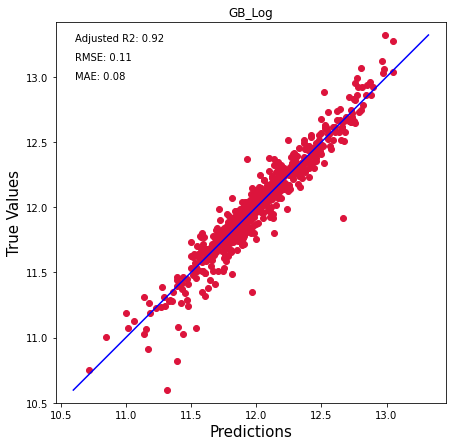

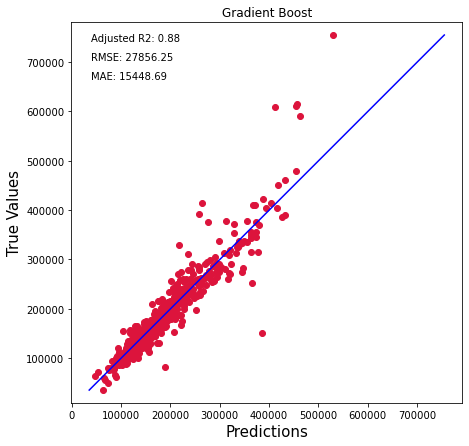

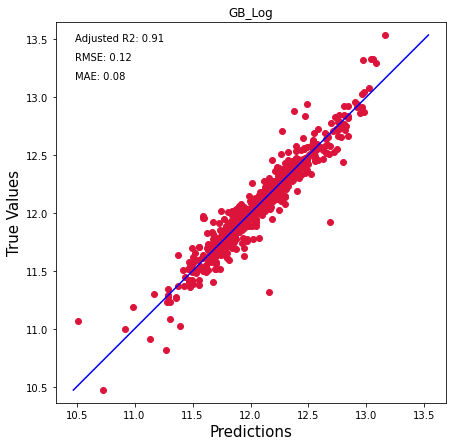

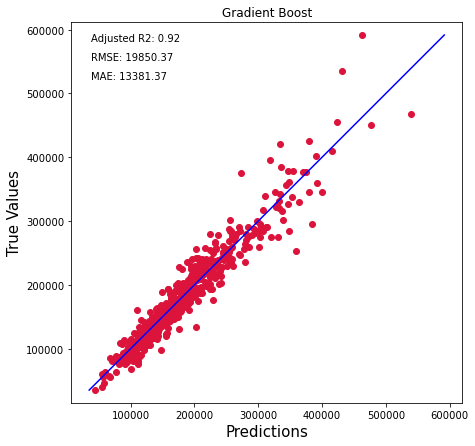

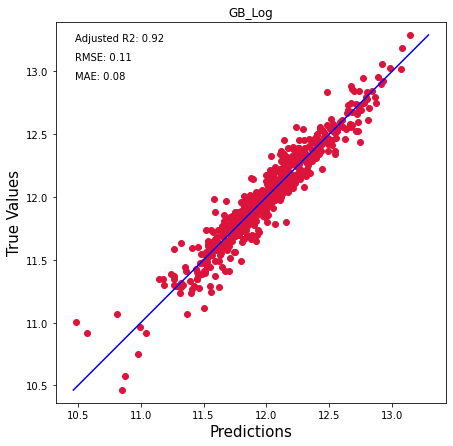

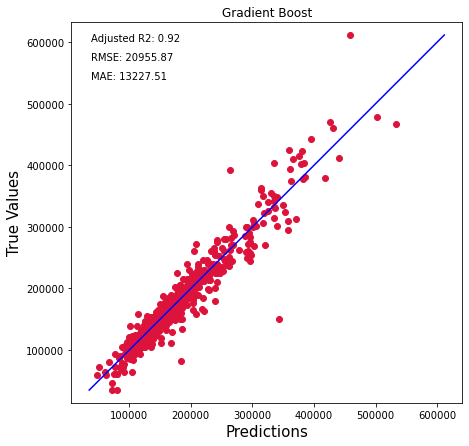

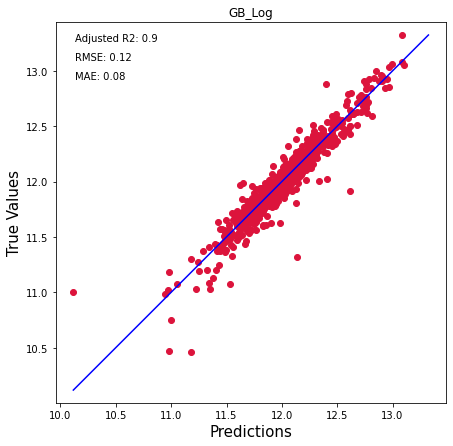

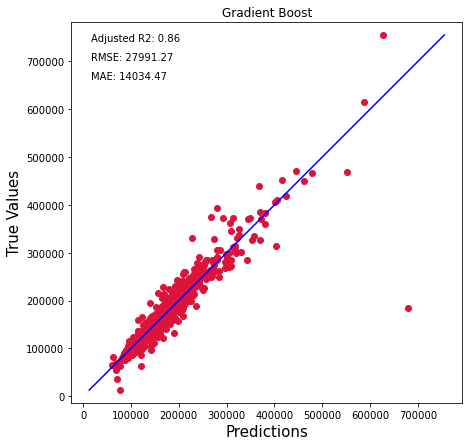

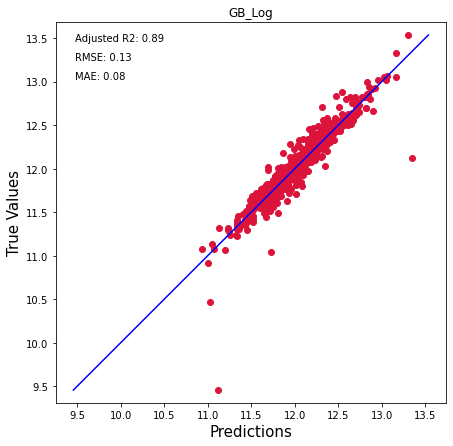

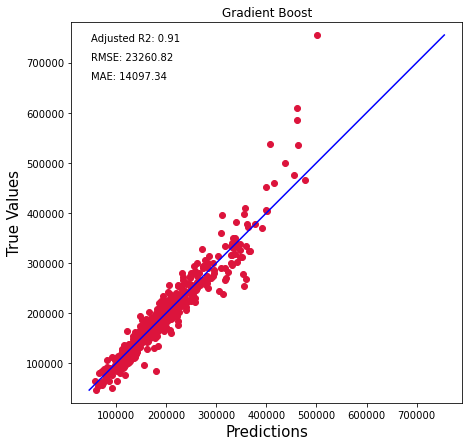

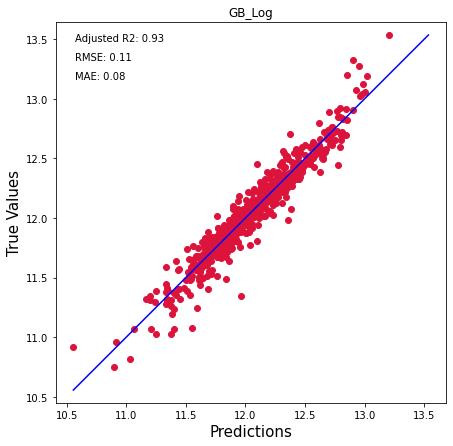

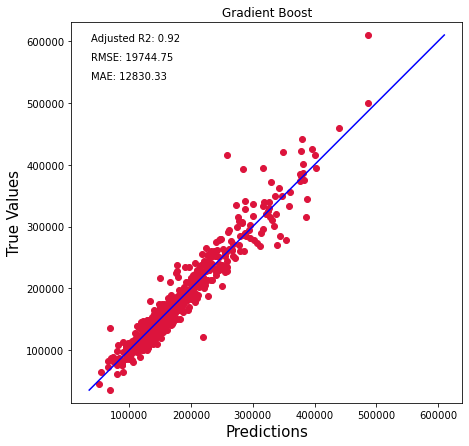

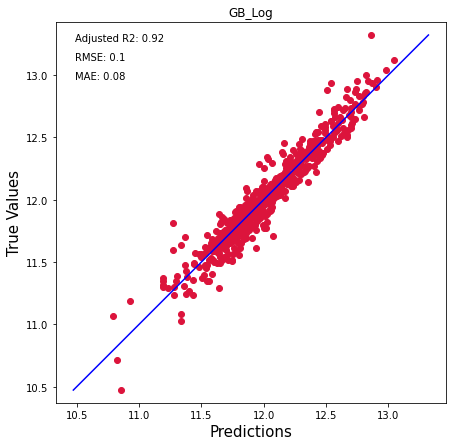

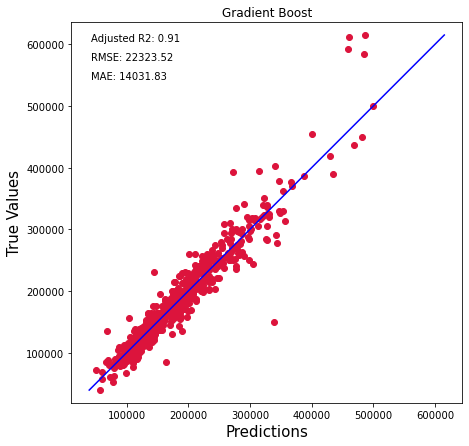

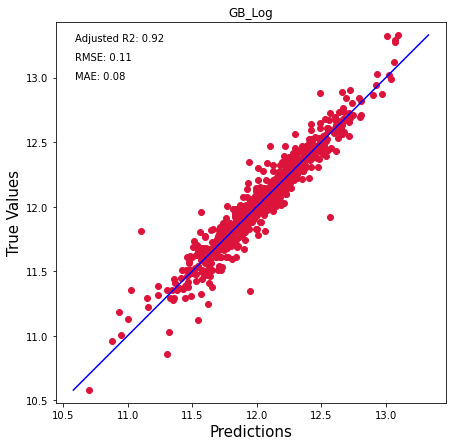

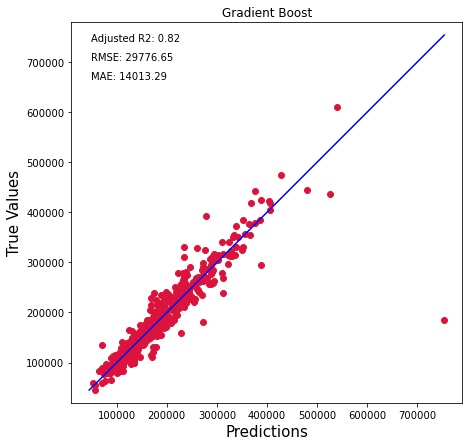

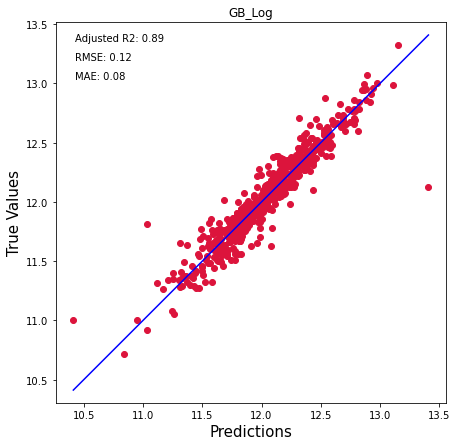

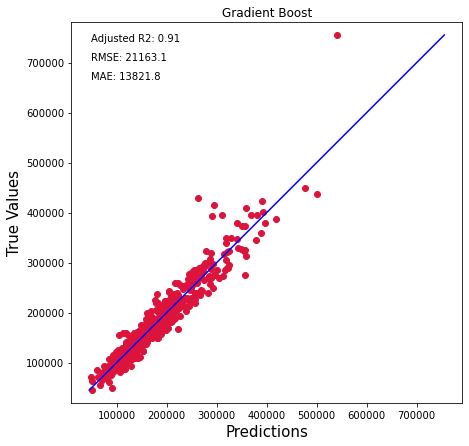

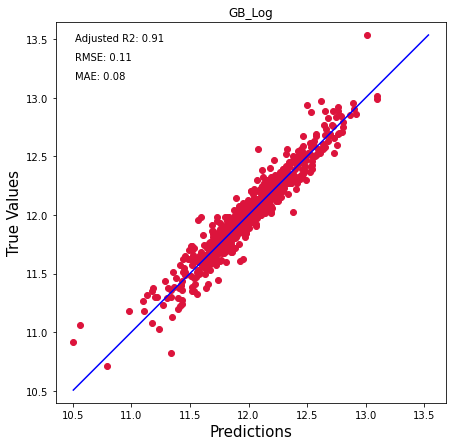

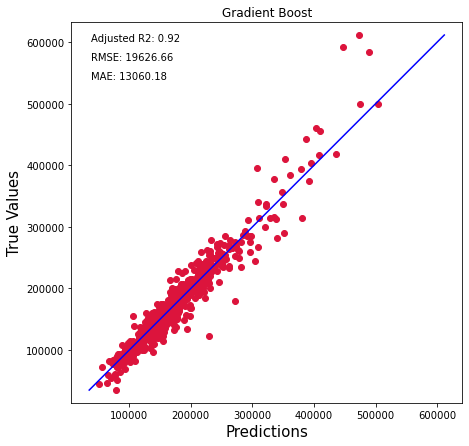

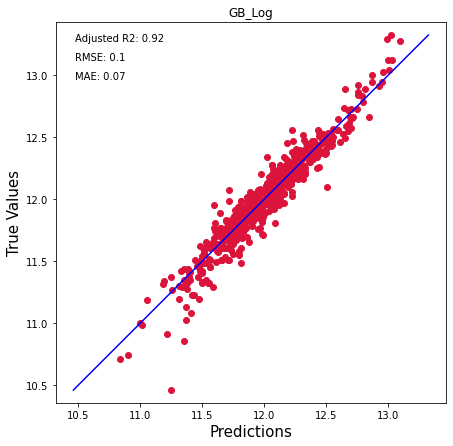

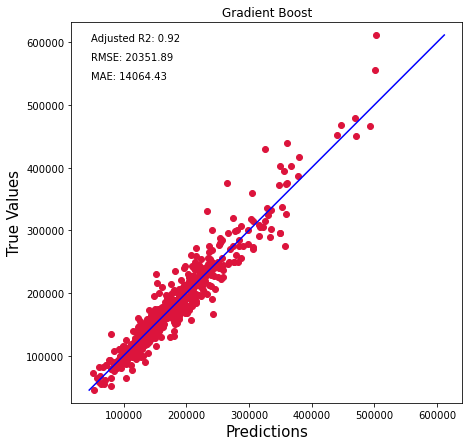

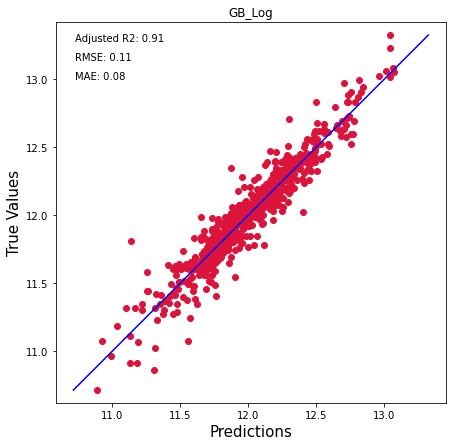

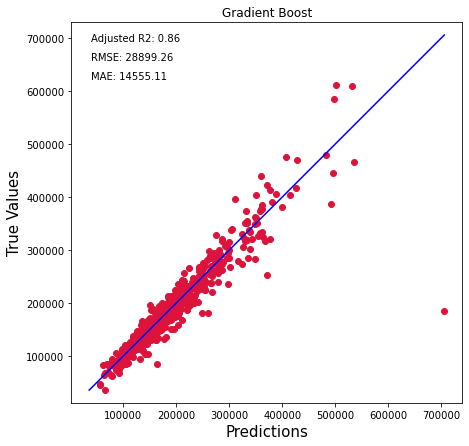

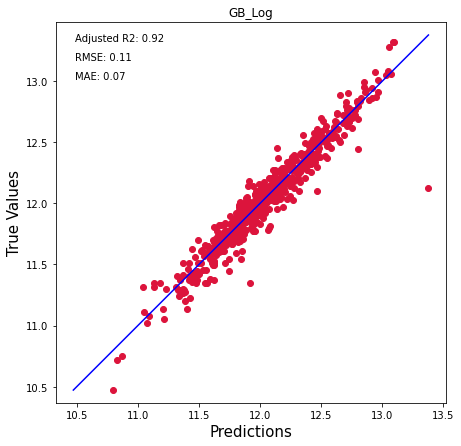

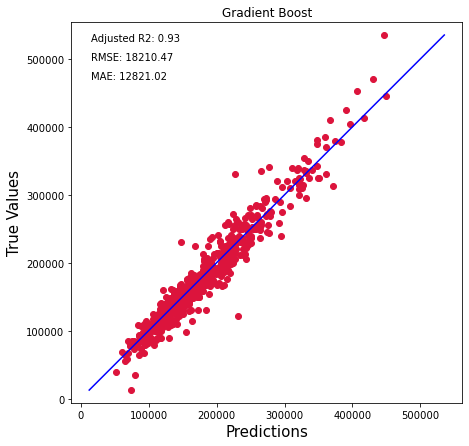

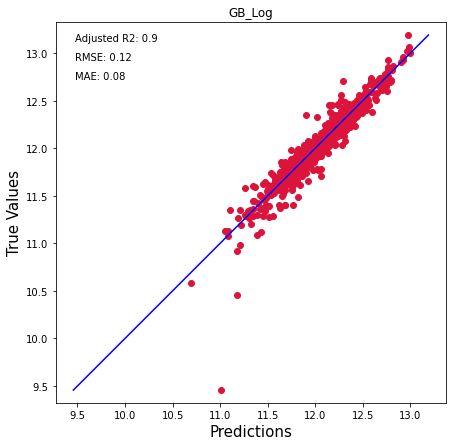

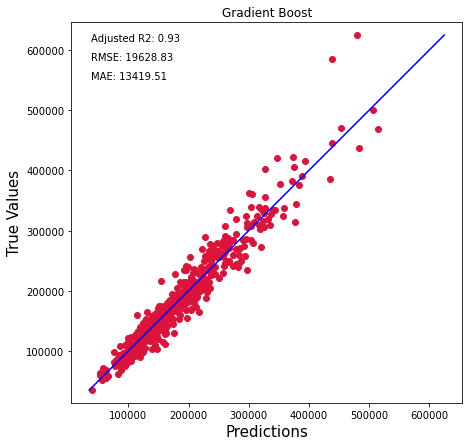

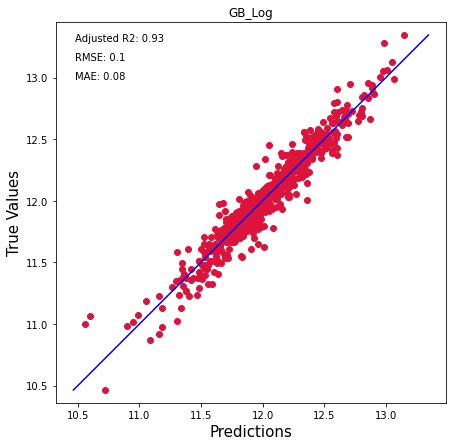

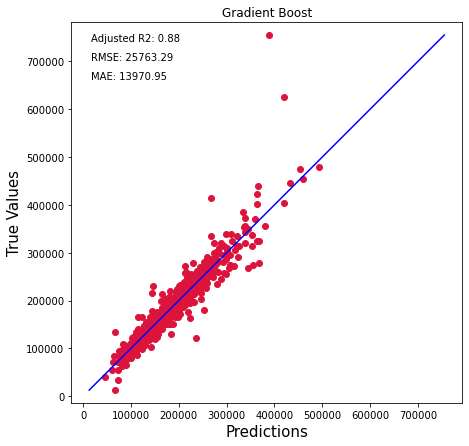

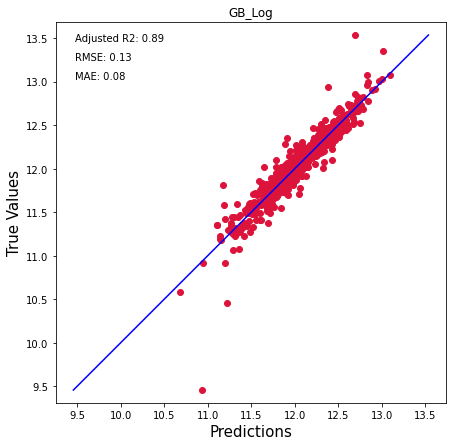

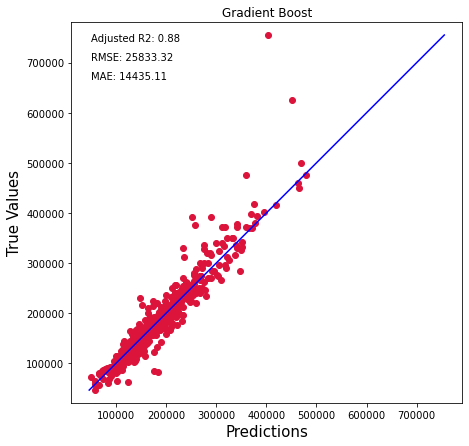

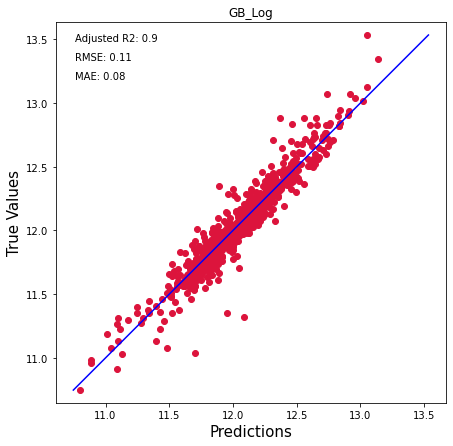

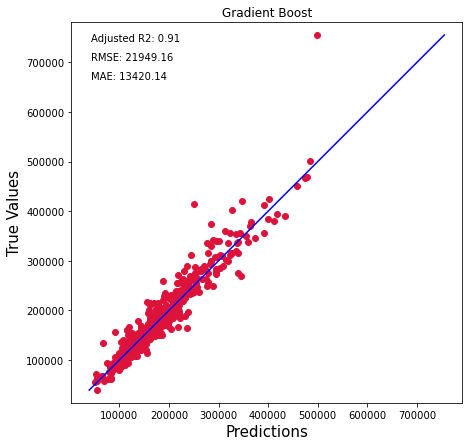

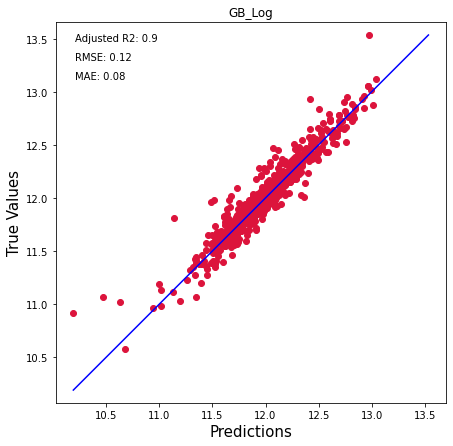

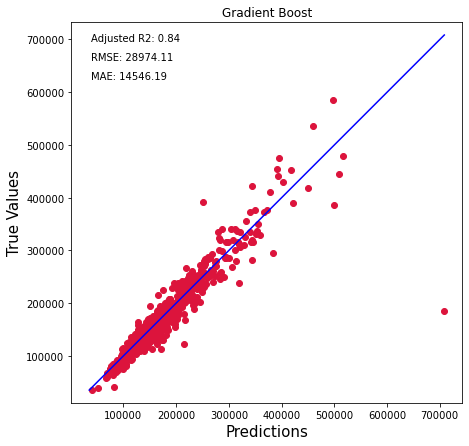

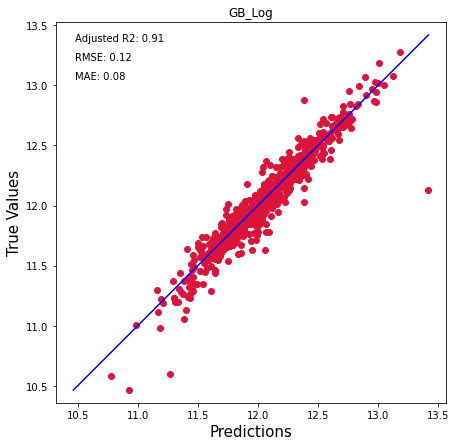

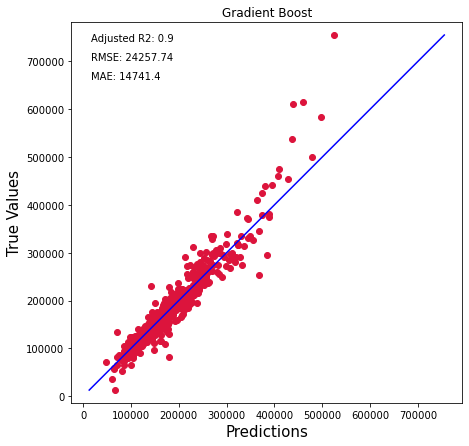

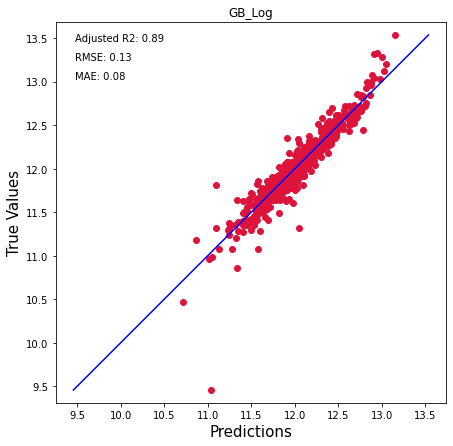

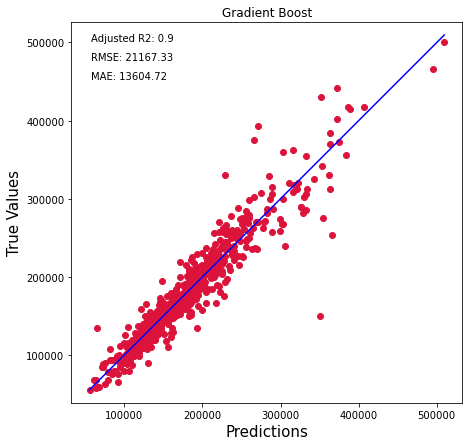

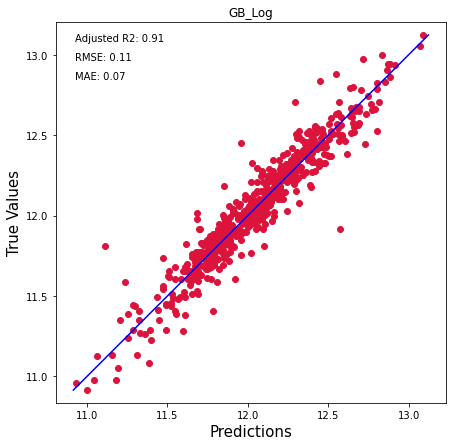

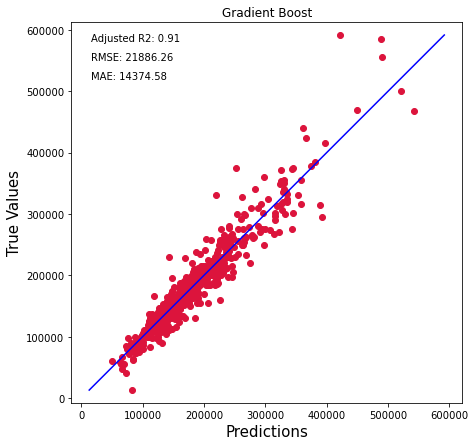

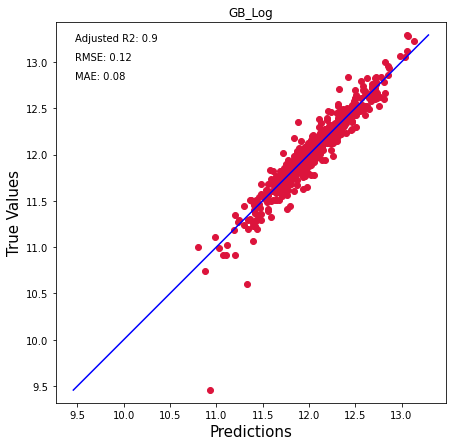

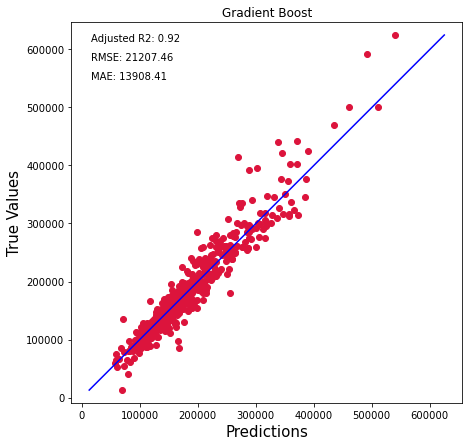

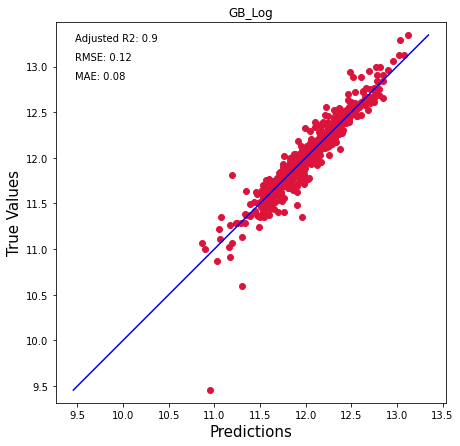

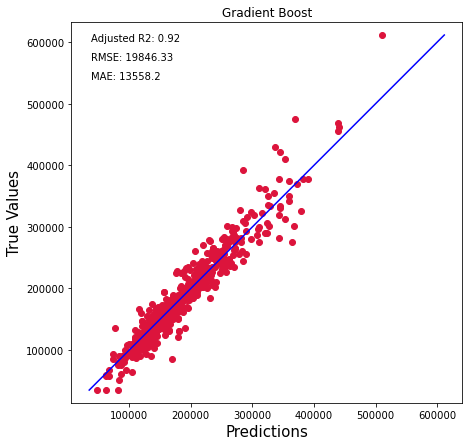

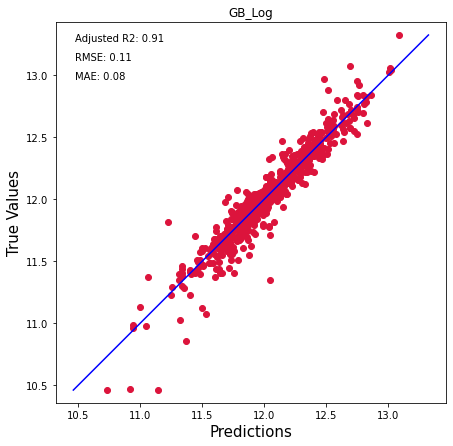

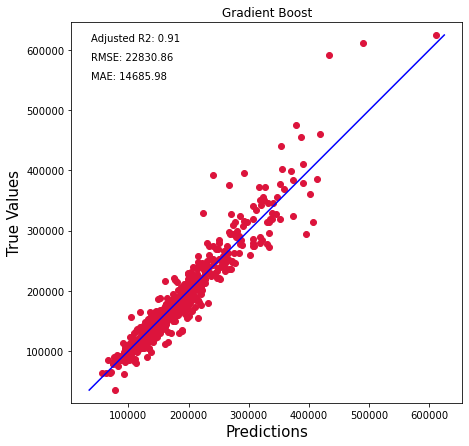

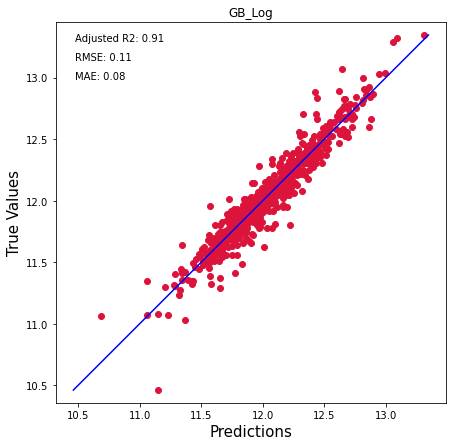

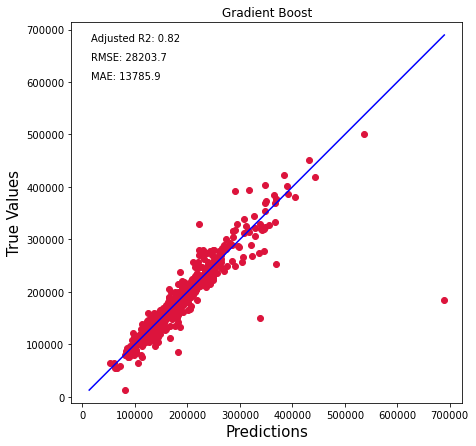

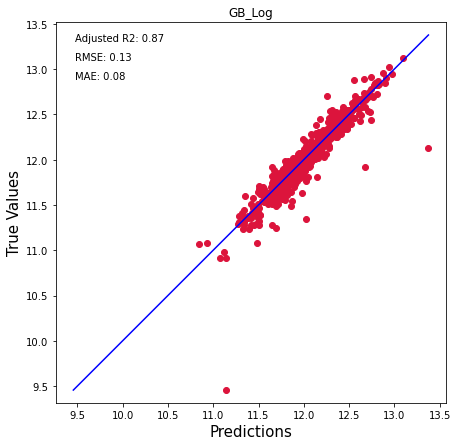

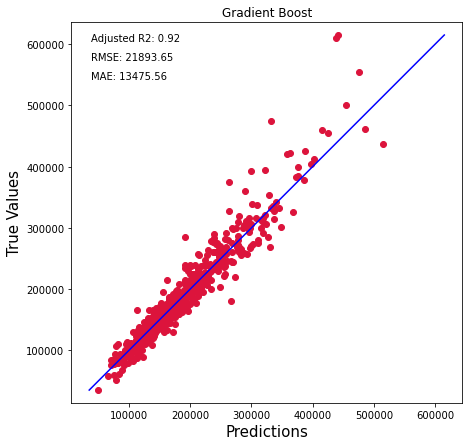

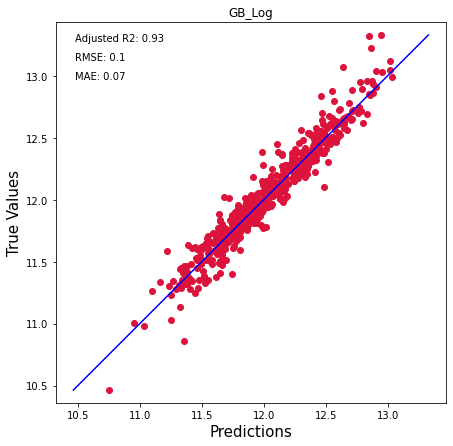

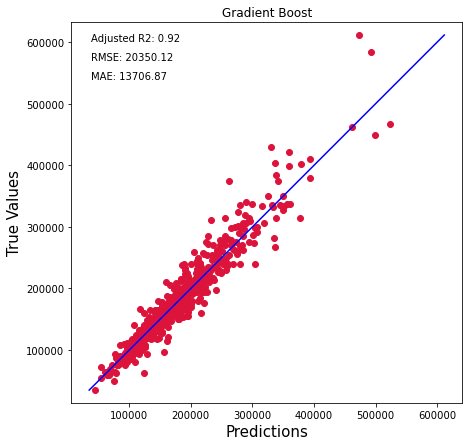

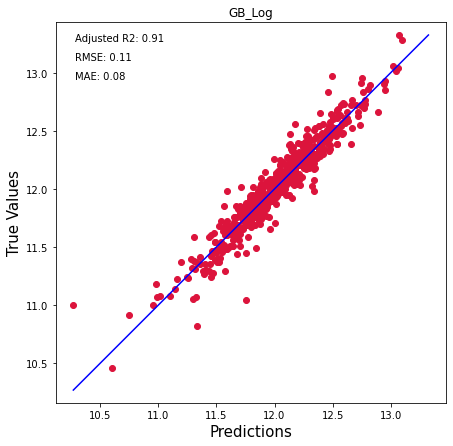

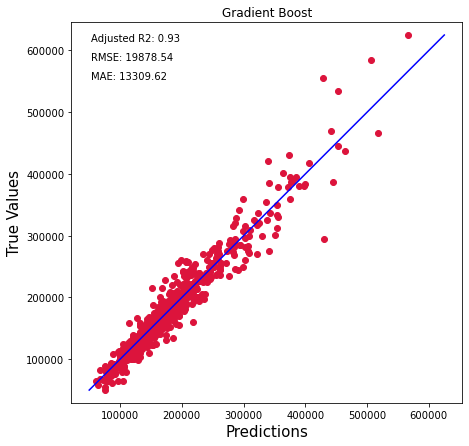

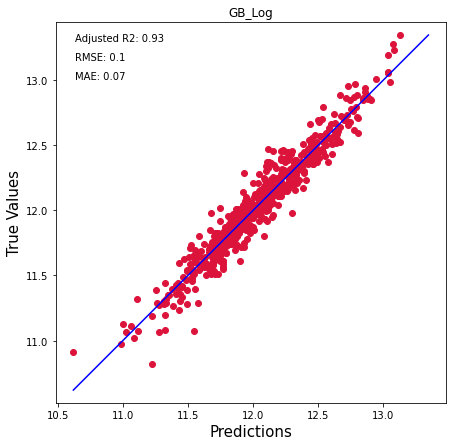

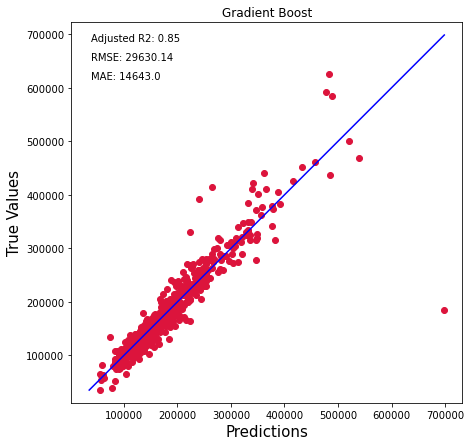

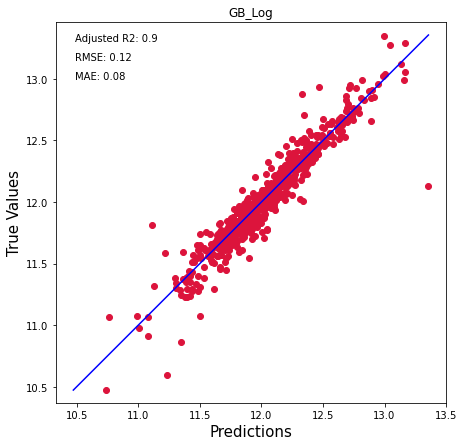

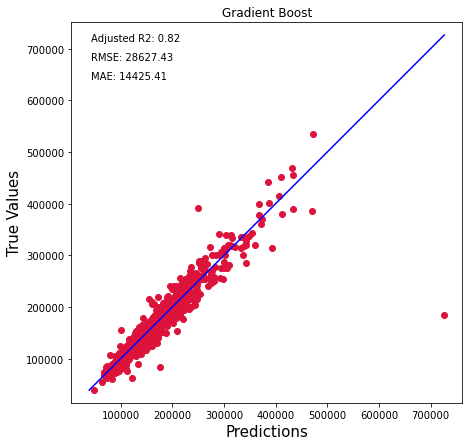

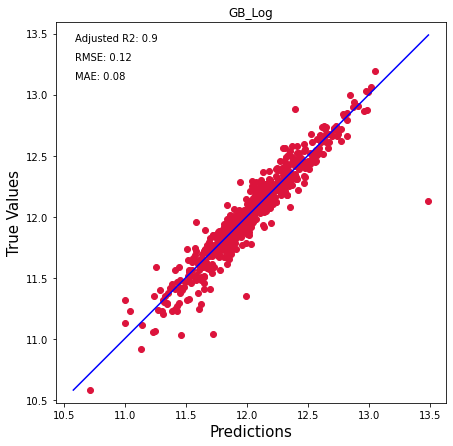

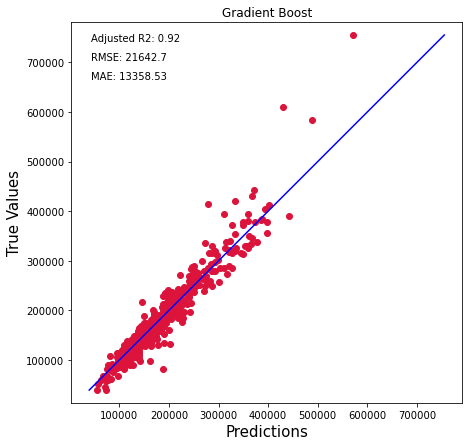

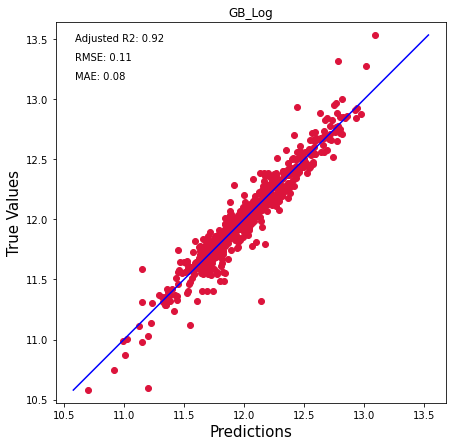

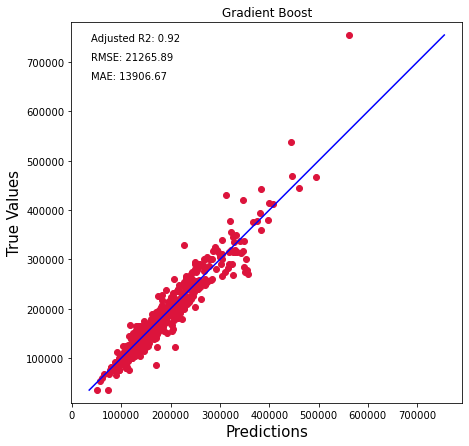

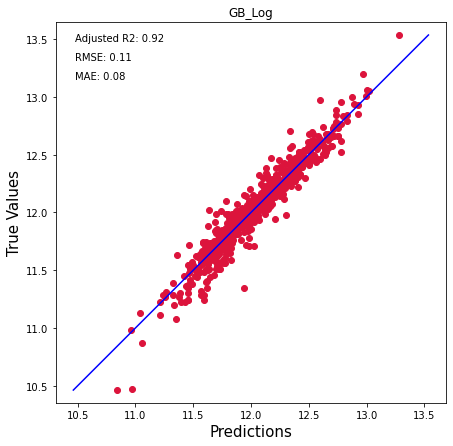

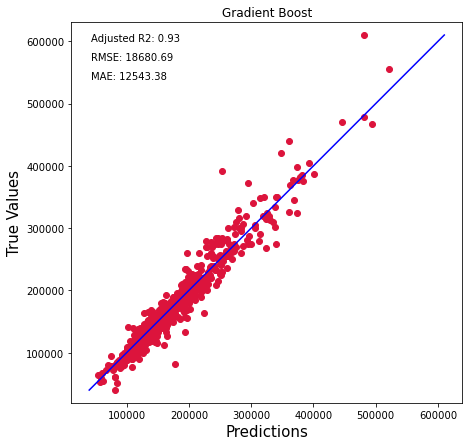

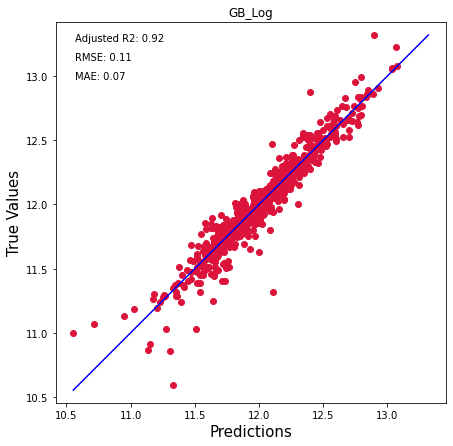

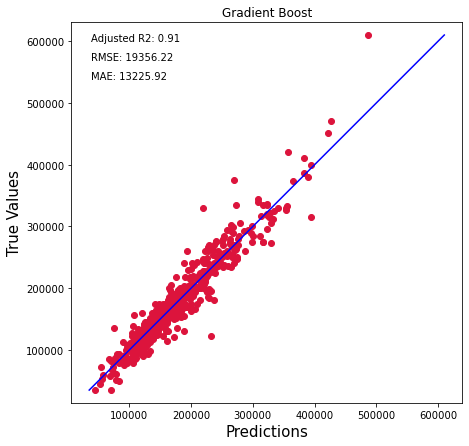

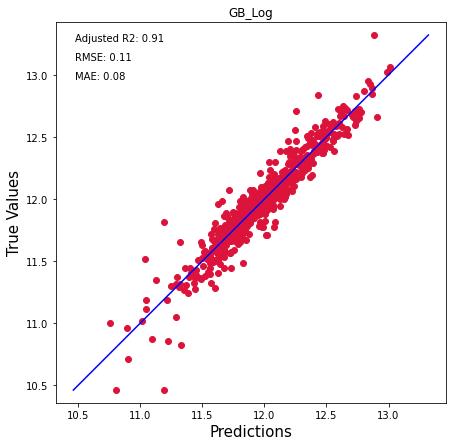

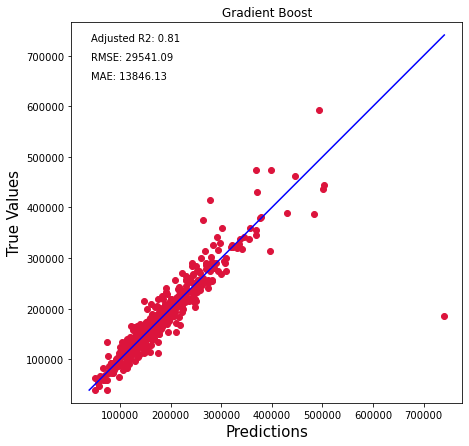

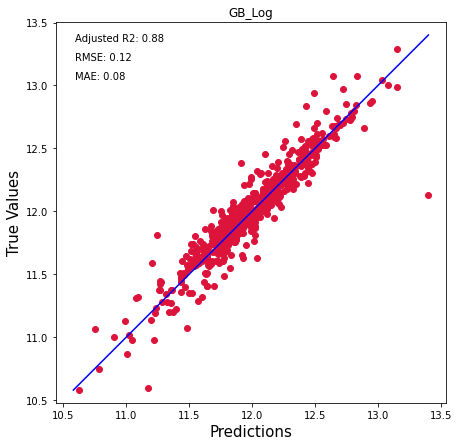

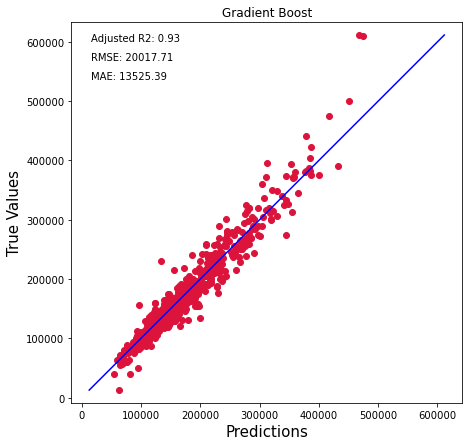

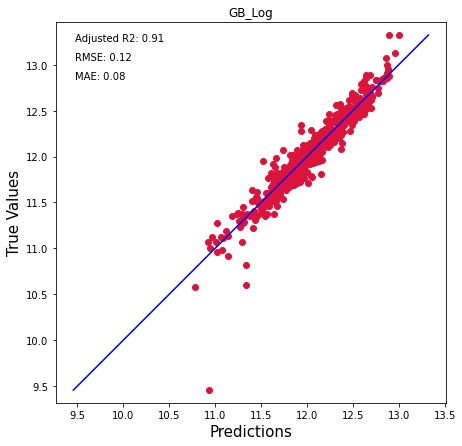

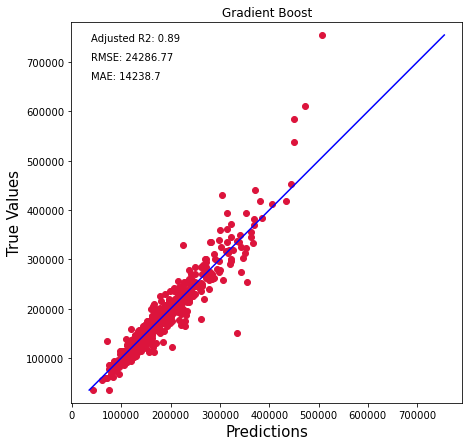

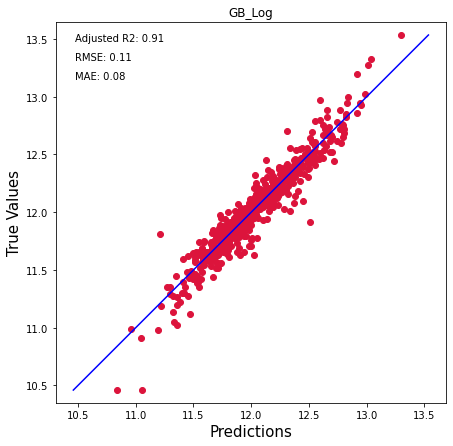

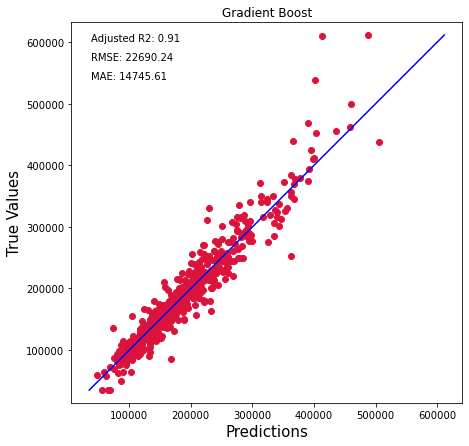

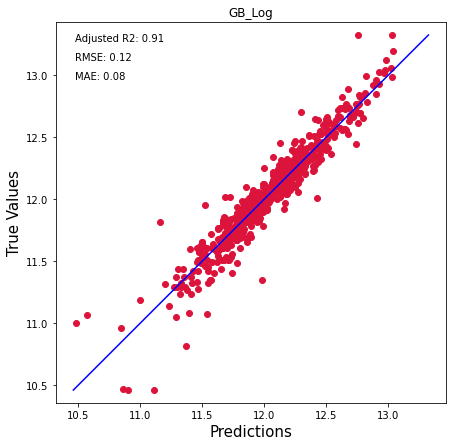

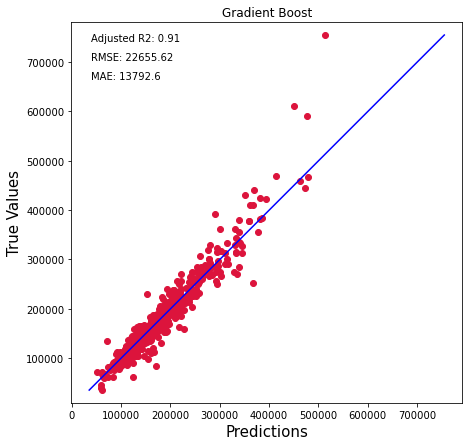

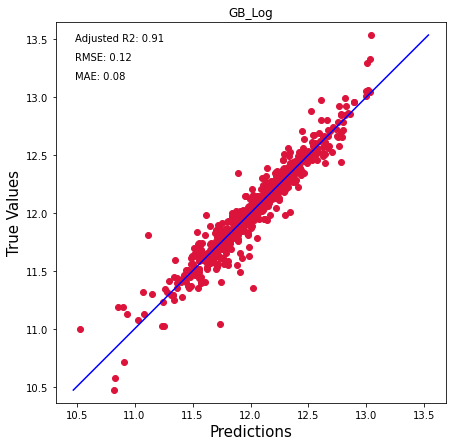

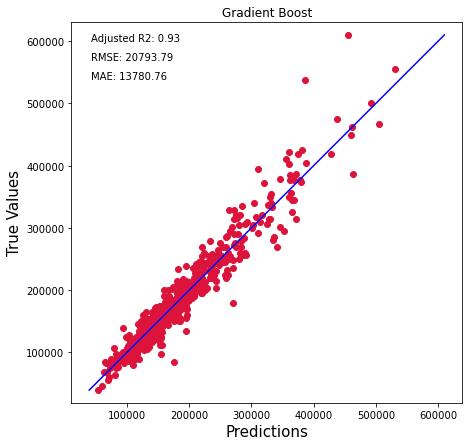

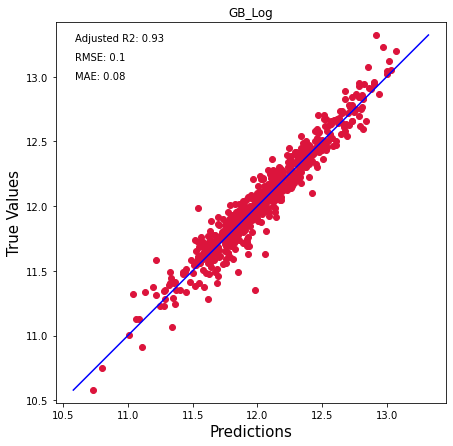

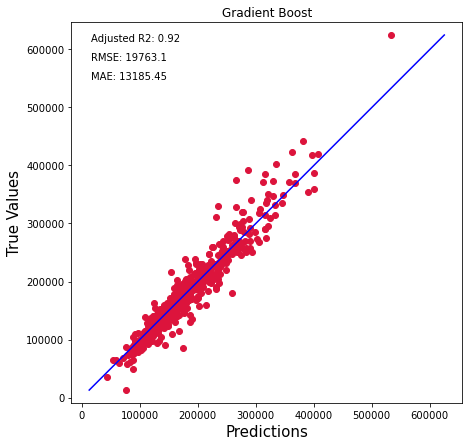

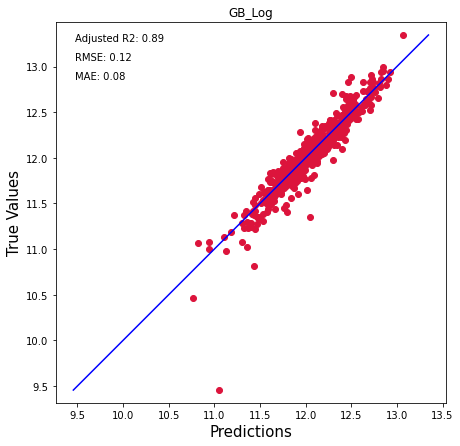

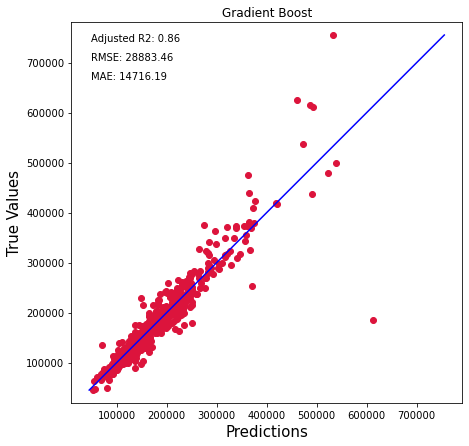

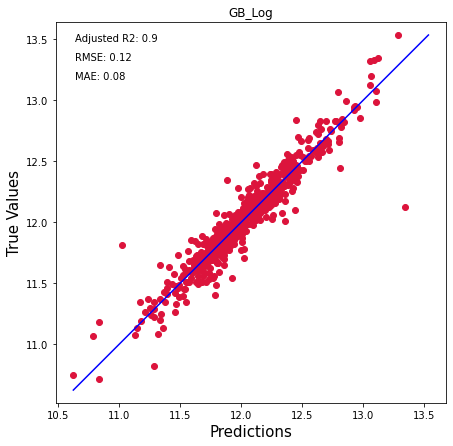

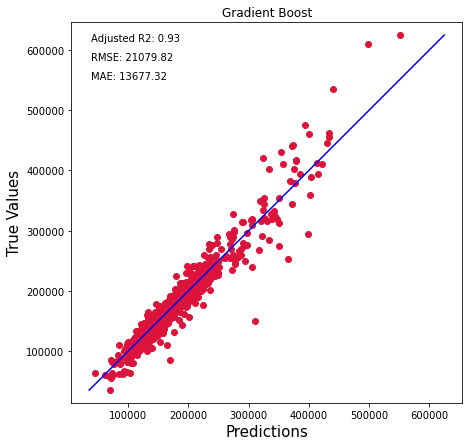

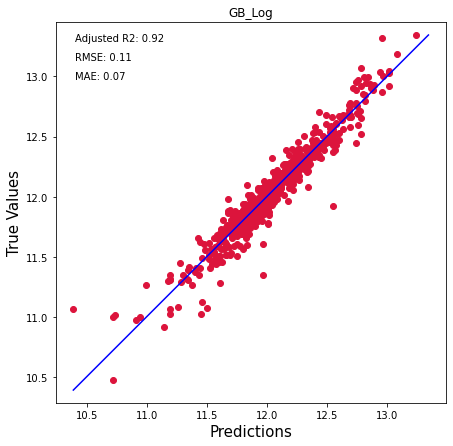

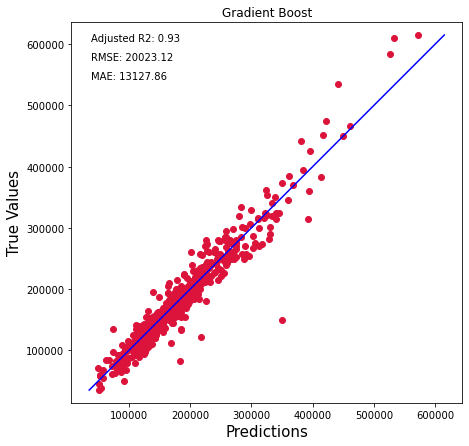

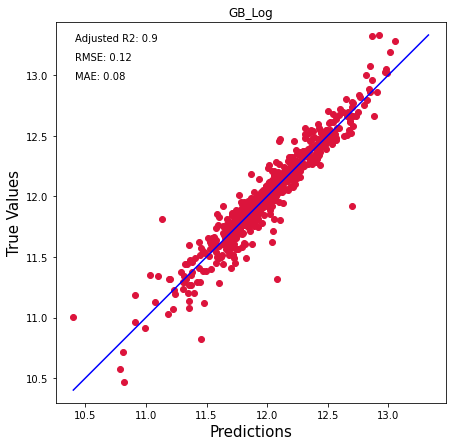

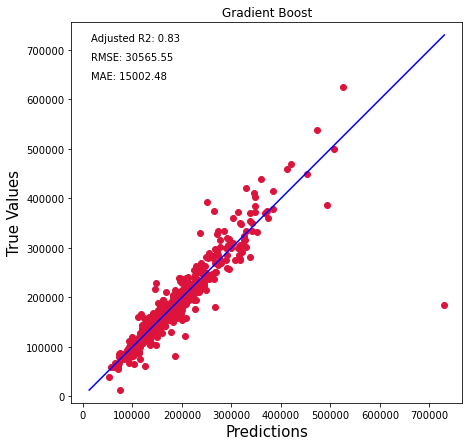

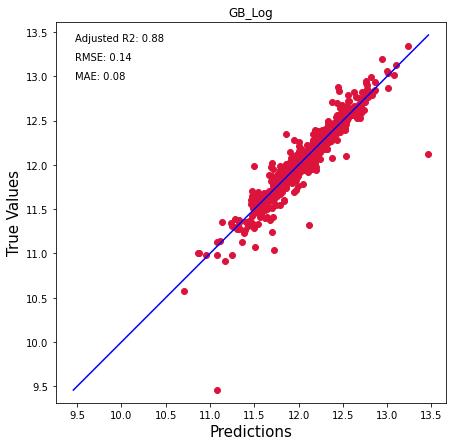

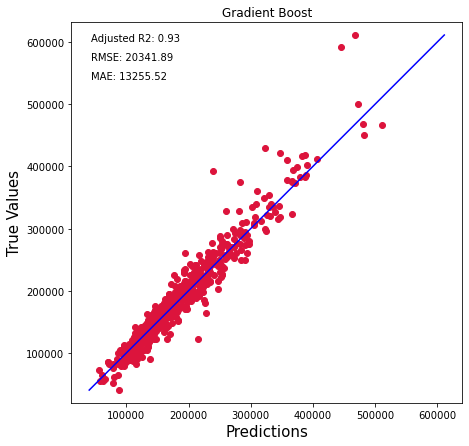

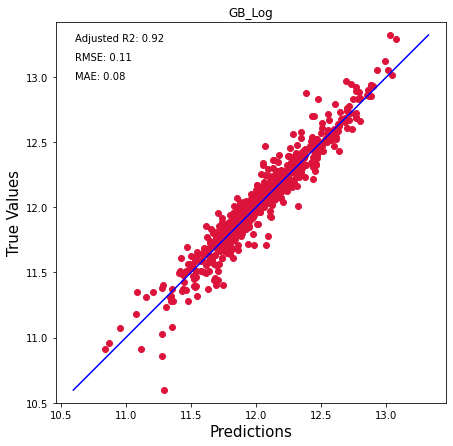

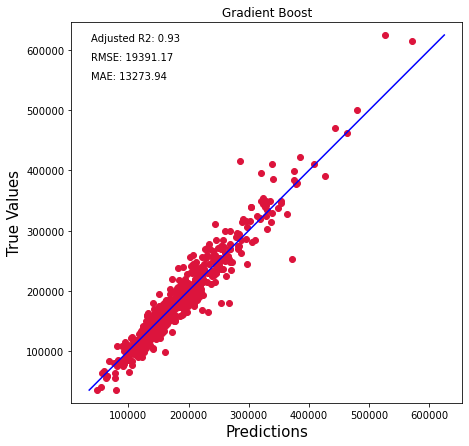

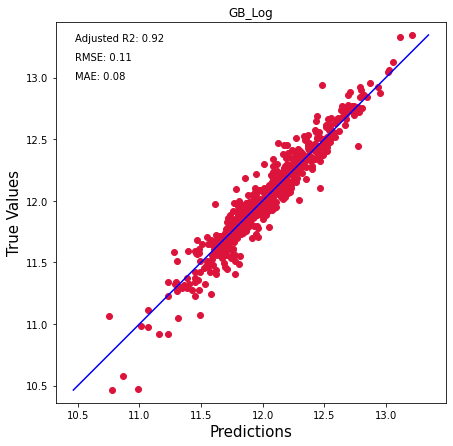

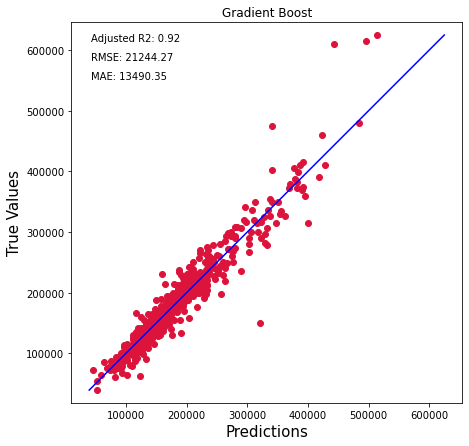

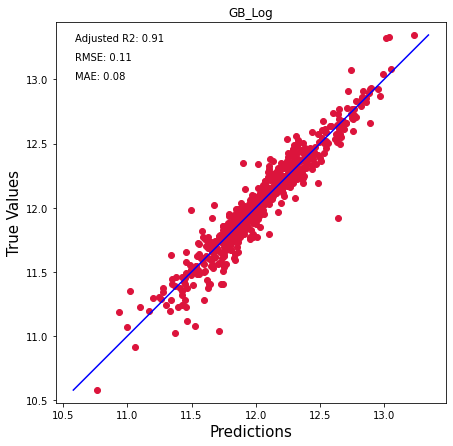

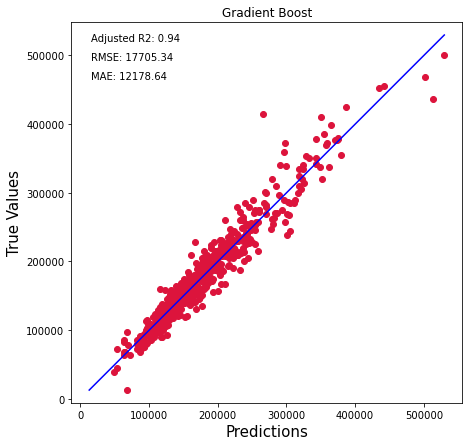

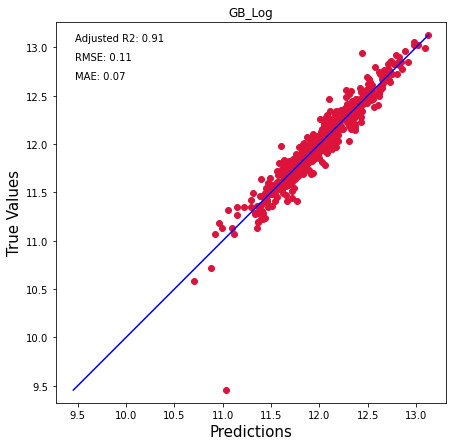

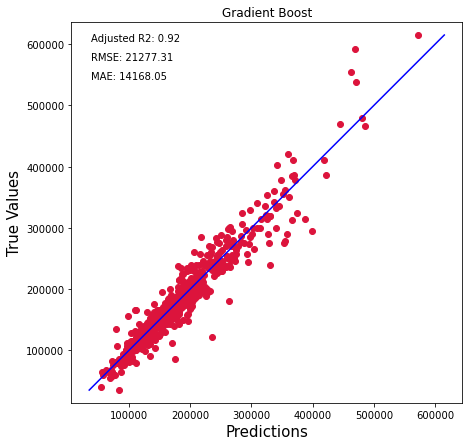

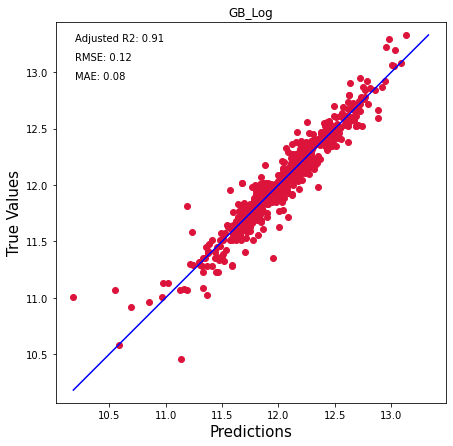

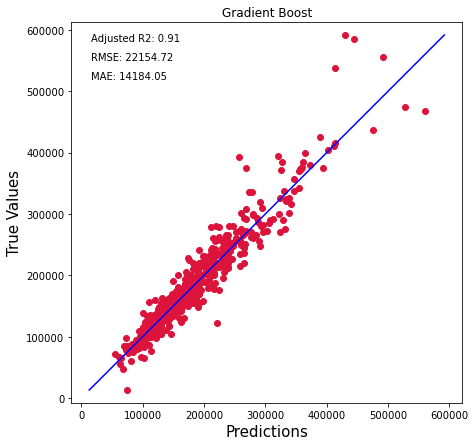

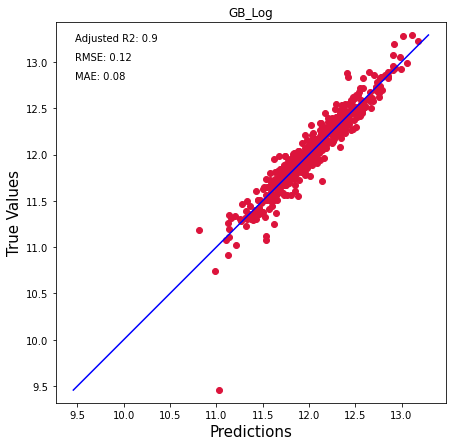

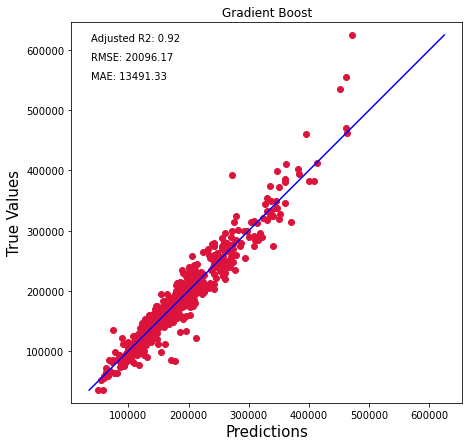

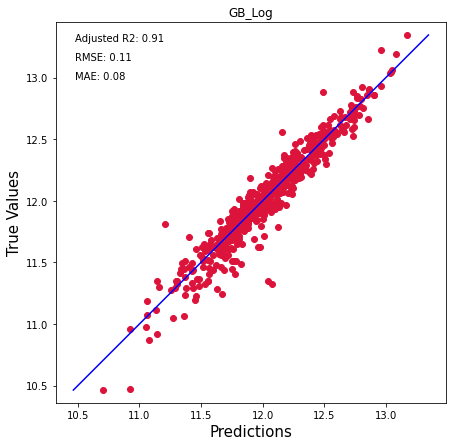

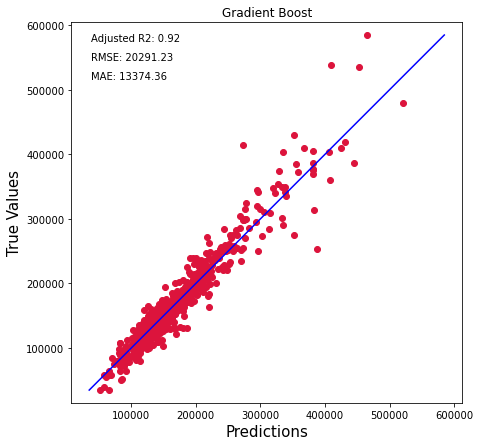

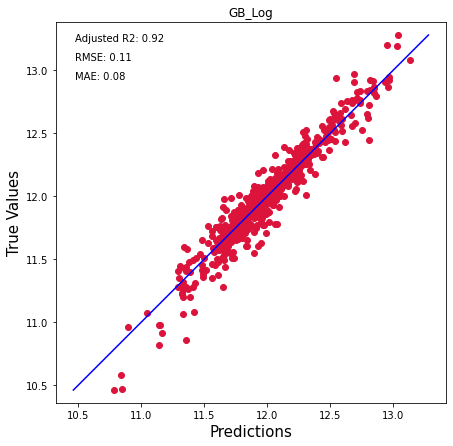

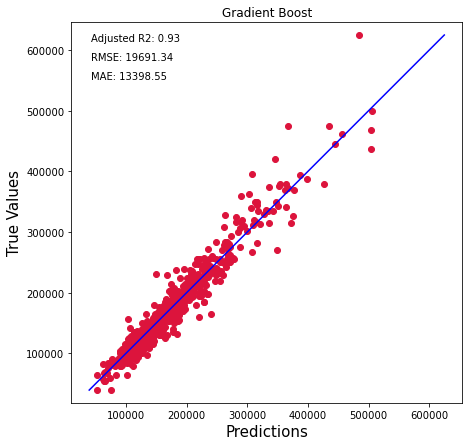

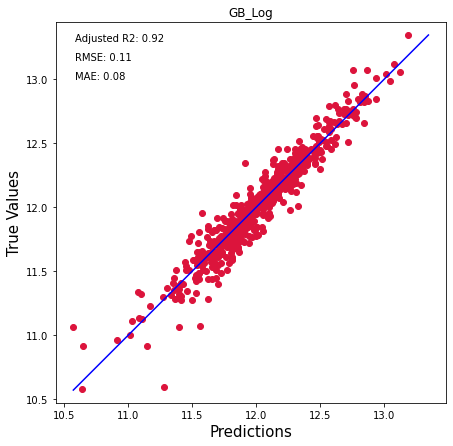

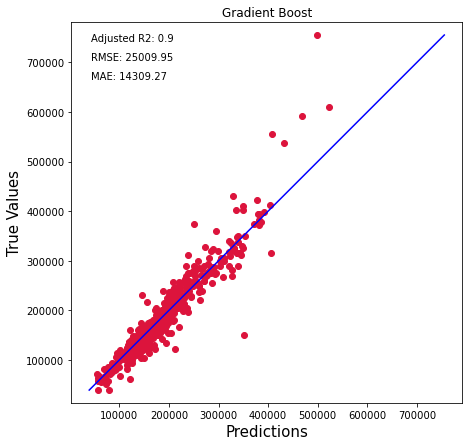

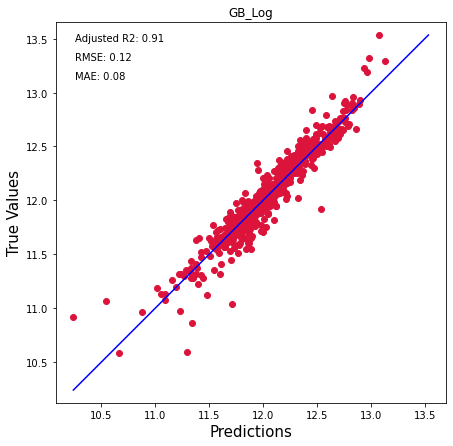

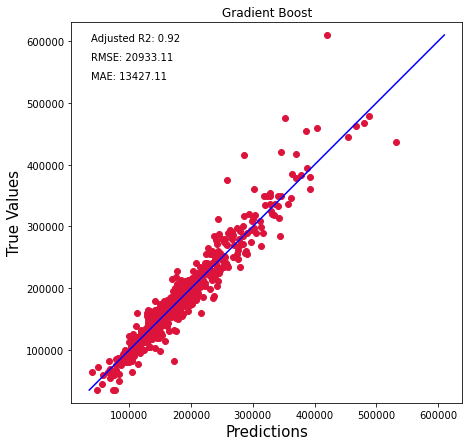

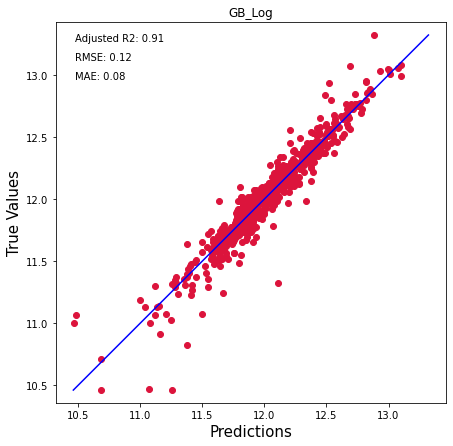

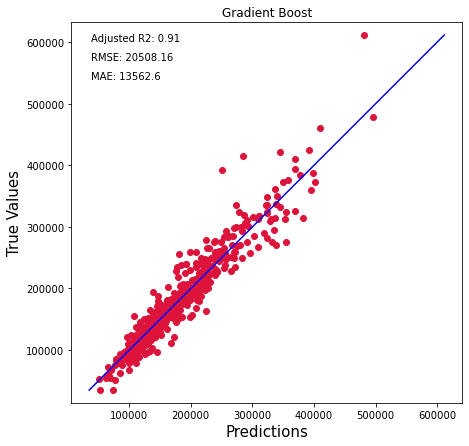

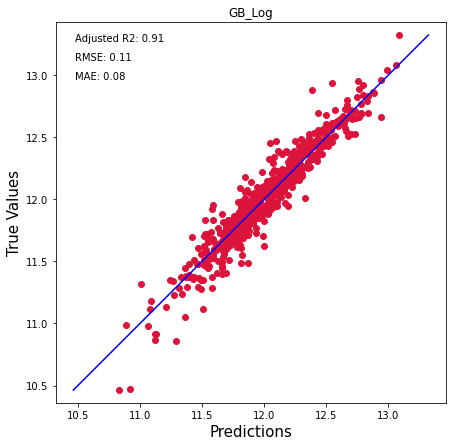

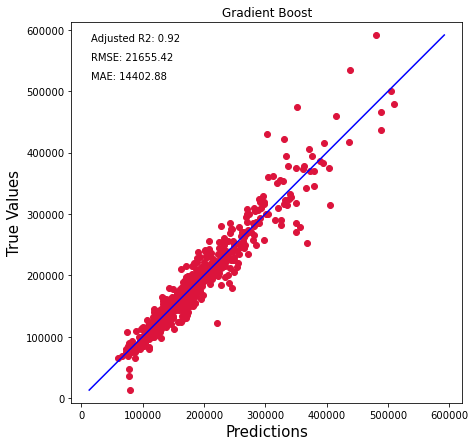

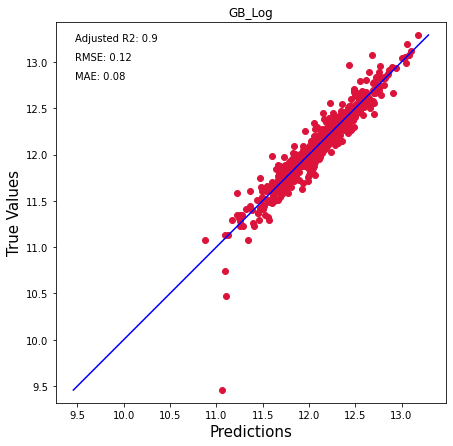

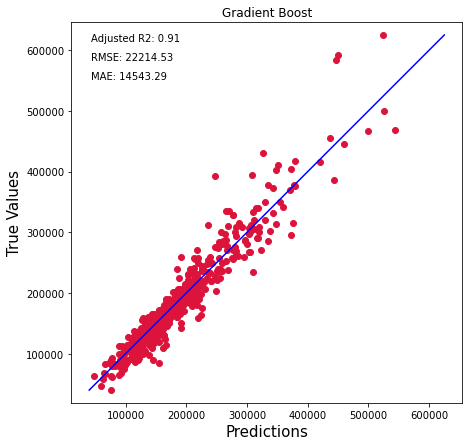

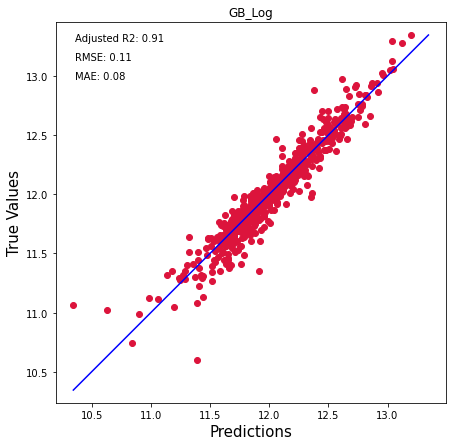

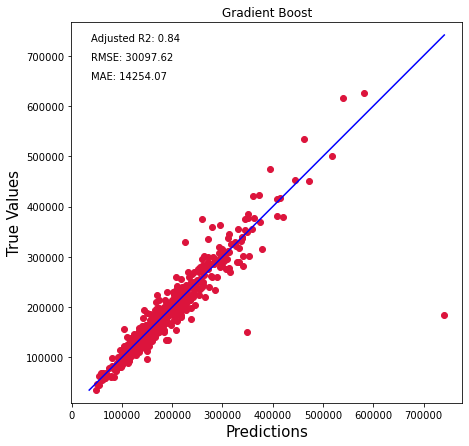

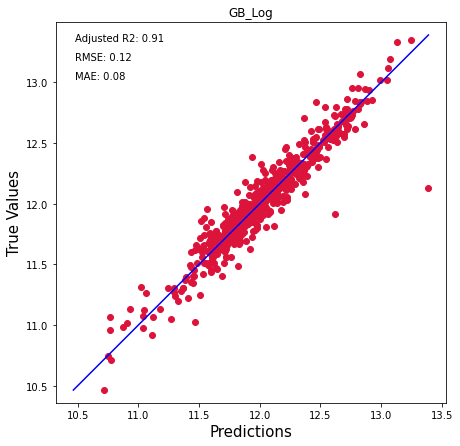

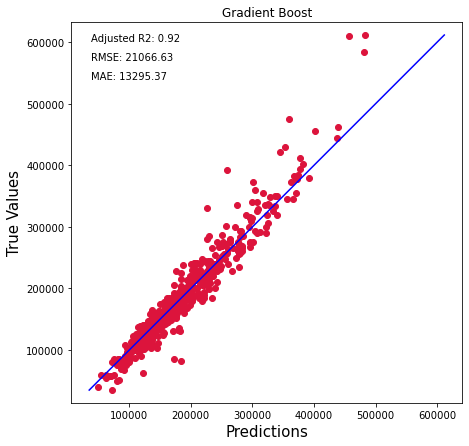

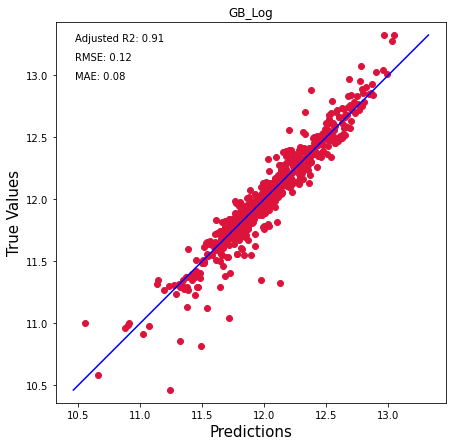

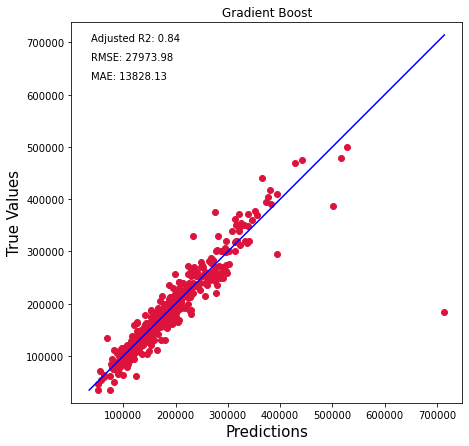

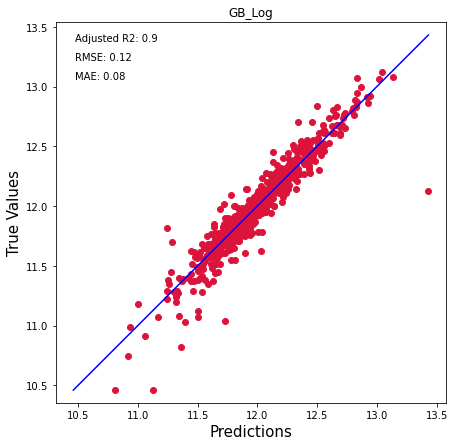

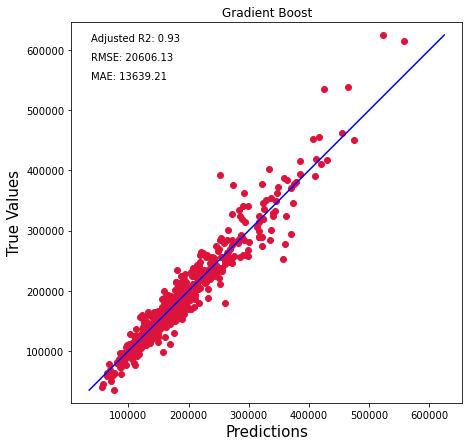

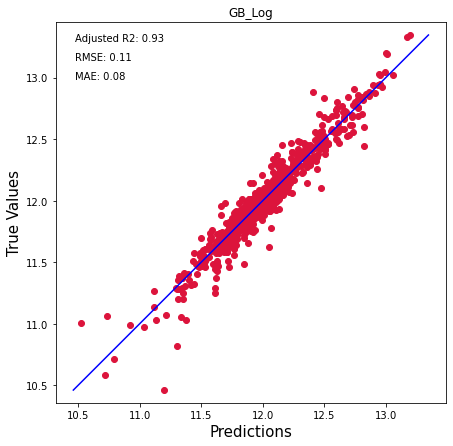

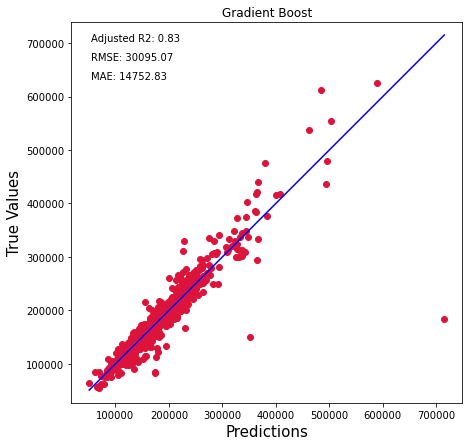

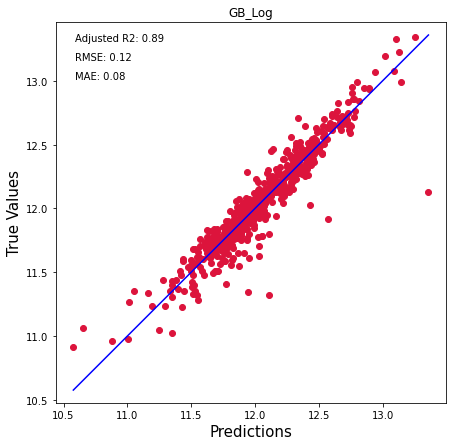

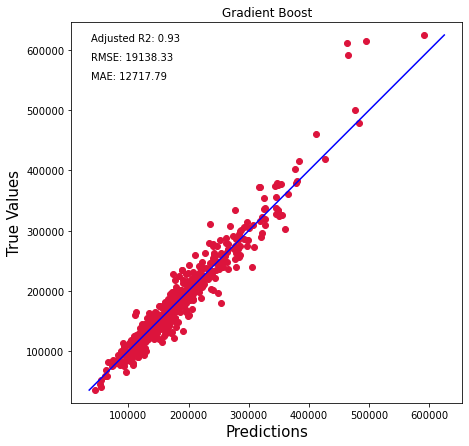

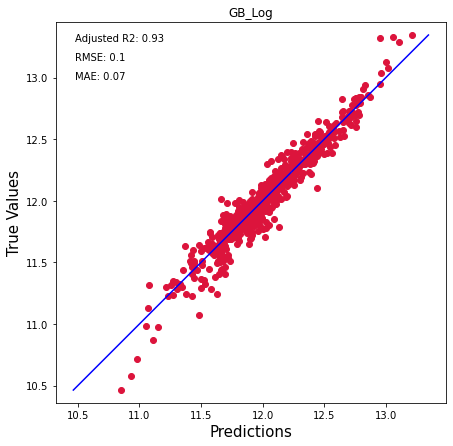

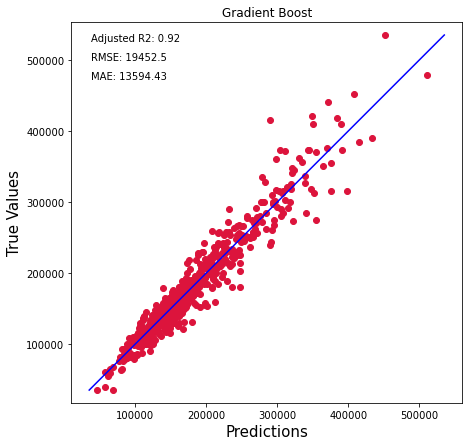

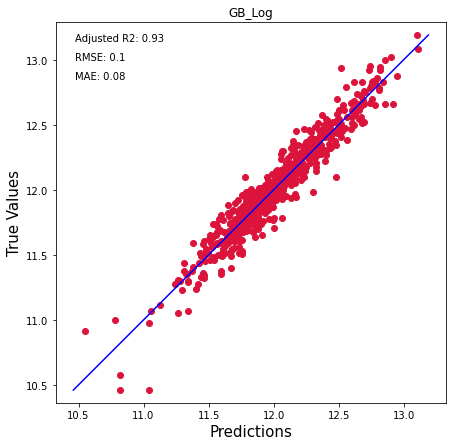

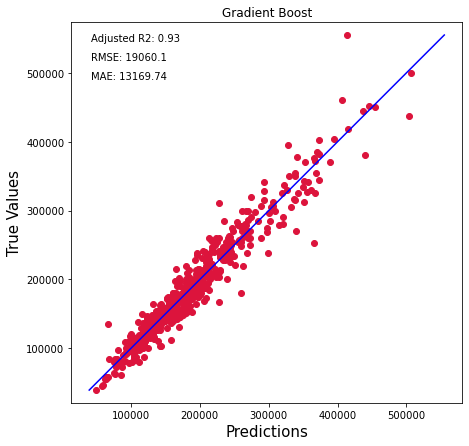

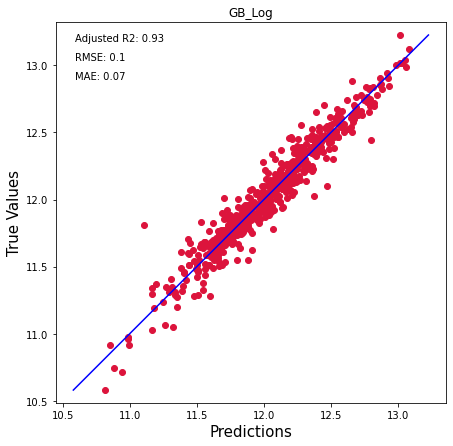

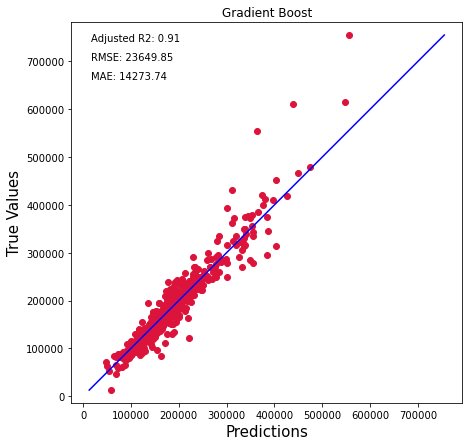

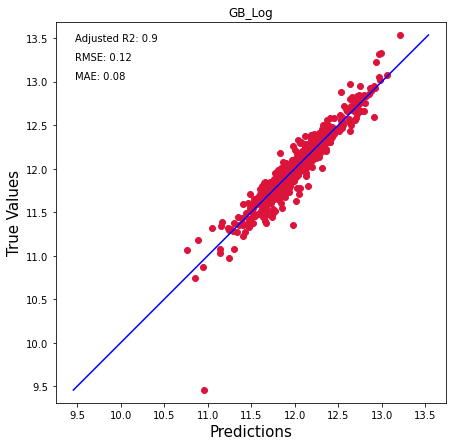

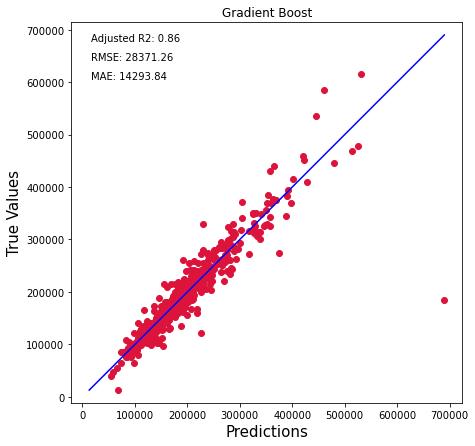

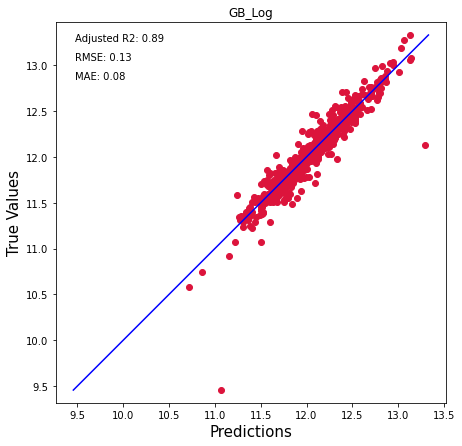

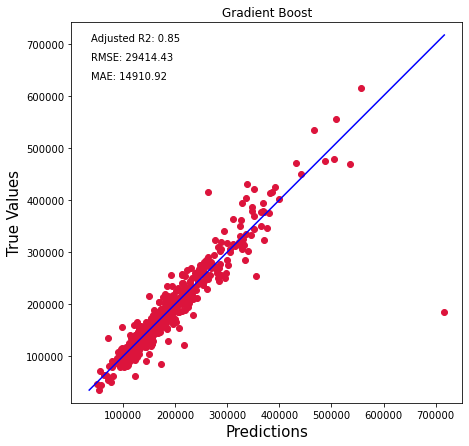

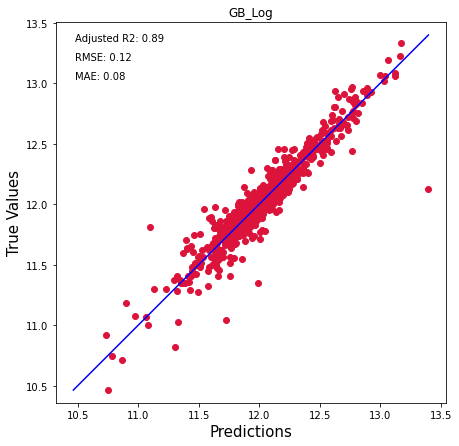

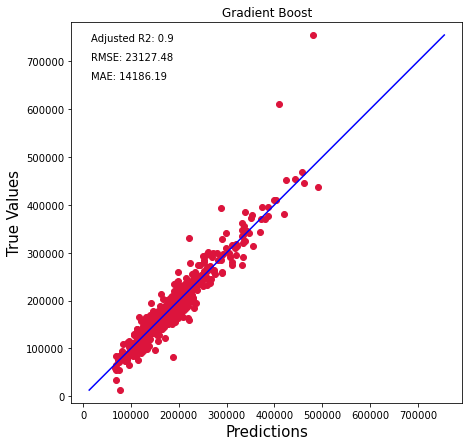

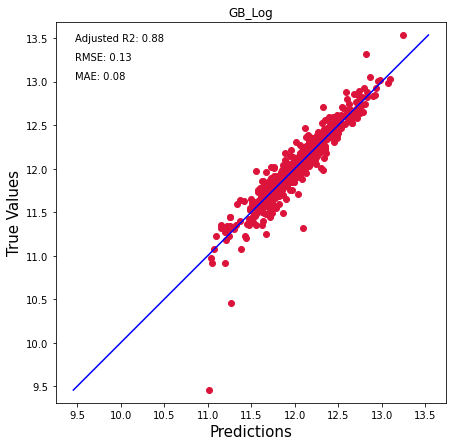

In [9]:
Scores = []
AdjR2 = []
MSE = []
RMSE = []
MAE = []

Scores_Log = []
AdjR2_Log = []
MSE_Log = []
RMSE_Log = []
MAE_Log = []
MAE_USD = []


for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    gbm = GradientBoostingRegressor()
    gbm.fit(X_train_scaled, Y_train)
    
    pred = gbm.predict(X_test_scaled)
    
    GBM_Score = gbm.score(X_test_scaled, Y_test)
    Scores.append(GBM_Score)
    
    Adj_r2 = 1 - (1 - GBM_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AdjR2.append(Adj_r2)
    
    mse = mean_squared_error(Y_test, pred)
    MSE.append(mse)
    
    rmse = np.sqrt(mse)
    RMSE.append(rmse)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE.append(mae)
    
    plt.figure(figsize=(7,7))
    plt.scatter(pred, Y_test, c='crimson')
    
    plt.title('Gradient Boost')
    p1 = max(max(pred), max(Y_test))
    p2 = min(min(pred), min(Y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('Predictions', fontsize=15)
    plt.ylabel('True Values', fontsize=15)
    plt.axis('equal')
    plt.annotate('Adjusted R2: ' + str(round(Adj_r2,2)), xy=(0.05, 0.95), xycoords='axes fraction')
    plt.annotate('RMSE: ' + str(round(rmse,2)), xy=(0.05, 0.90), xycoords='axes fraction')
    plt.annotate('MAE: ' + str(round(mae,2)), xy=(0.05, 0.85), xycoords='axes fraction')
    plt.show()
    
    
    y_train_log = np.log(Y_train)
    y_test_log = np.log(Y_test)
    
    gbm.fit(X_train_scaled, y_train_log)
    pred_log = gbm.predict(X_test_scaled)
    
    Score = r2_score(y_test_log, pred_log)
    Scores_Log.append(Score)
    
    Adj_r2 = 1 - (1-r2_score(y_test_log, pred_log)) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AdjR2_Log.append(Adj_r2)
    
    mse = mean_squared_error(y_test_log, pred_log)
    MSE_Log.append(mse)
    
    rmse = np.sqrt(mse)
    RMSE_Log.append(rmse)
    
    mae = mean_absolute_error(y_test_log, pred_log)
    MAE_Log.append(mae)
    
    PredUSD = np.exp(pred_log)
    maeUSD = mean_absolute_error(Y_test, PredUSD)
    MAE_USD.append(maeUSD)
    
    plt.figure(figsize=(7,7))
    plt.scatter(pred_log, y_test_log, c='crimson')

    plt.title('GB_Log')
    p1 = max(max(pred_log), max(y_test_log))
    p2 = min(min(pred_log), min(y_test_log))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('Predictions', fontsize=15)
    plt.ylabel('True Values', fontsize=15)
    plt.axis('equal')
    plt.annotate('Adjusted R2: ' + str(round(Adj_r2,2)), xy=(0.05, 0.95), xycoords='axes fraction')
    plt.annotate('RMSE: ' + str(round(rmse,2)), xy=(0.05, 0.90), xycoords='axes fraction')
    plt.annotate('MAE: ' + str(round(mae,2)), xy=(0.05, 0.85), xycoords='axes fraction')
    plt.show()
    
    
    
    
    

In [10]:
combo = pd.DataFrame({'R_Squared': Scores, 'Adjusted_R2': AdjR2, 'Mean Squared Error': MSE,
                      'Root MSE': RMSE, 'Mean Absolute Error': MAE})

In [11]:
combo

R_Squared  Adjusted_R2  Mean Squared Error      Root MSE  \
0    0.932711     0.930502        3.716987e+08  19279.487951   
1    0.920618     0.918011        4.465604e+08  21131.976187   
2    0.833563     0.828097        9.251959e+08  30417.032262   
3    0.907771     0.904743        5.550303e+08  23559.080859   
4    0.917542     0.914834        4.915277e+08  22170.423809   
5    0.915378     0.912600        4.865808e+08  22058.576186   
6    0.928691     0.926349        4.328921e+08  20806.058908   
7    0.904536     0.901402        5.468228e+08  23384.242271   
8    0.837571     0.832237        8.209675e+08  28652.531221   
9    0.910581     0.907645        4.594384e+08  21434.514262   
10   0.934477     0.932325        3.418413e+08  18488.952034   
11   0.858016     0.853353        7.812157e+08  27950.236286   
12   0.920722     0.918118        3.801656e+08  19497.834529   
13   0.915200     0.912415        5.567482e+08  23595.512959   
14   0.917562     0.914855        4.740269e+08  21772.159004   
15   0.878156     0.874155        7.395575e+08  27194.807078   
16   0.812321     0.806158        8.626540e+08  29370.971369   
17   0.923587     0.921078        3.594220e+08  18958.428679   
18   0.916468     0.913725        3.528788e+08  18785.067476   
19   0.927822     0.925452        4.123638e+08  20306.742160   
20   0.926049     0.923620        3.620622e+08  19027.931847   
21   0.907797     0.904769        5.662654e+08  23796.332566   
22   0.926084     0.923657        4.027204e+08  20067.895090   
23   0.860724     0.856151        8.299878e+08  28809.508638   
24   0.909855     0.906895        5.400999e+08  23240.049944   
25   0.930585     0.928305        3.445149e+08  18561.113836   
26   0.923710     0.921205        4.406958e+08  20992.756024   
27   0.836711     0.831349        9.242220e+08  30401.019158   
28   0.934866     0.932727        3.778586e+08  19438.585373   
29   0.881867     0.877987        7.759709e+08  27856.254736   
30   0.924770     0.922300        3.940370e+08  19850.365462   
31   0.918784     0.916116        4.391485e+08  20955.871408   
32   0.864362     0.859908        7.835111e+08  27991.267524   
33   0.915850     0.913087        5.410659e+08  23260.822969   
34   0.926357     0.923938        3.898550e+08  19744.745694   
35   0.916561     0.913821        4.983397e+08  22323.522564   
36   0.827343     0.821673        8.866490e+08  29776.651152   
37   0.913147     0.910295        4.478768e+08  21163.099479   
38   0.926416     0.924000        3.852057e+08  19626.659123   
39   0.919127     0.916471        4.141994e+08  20351.890053   
40   0.869162     0.864865        8.351673e+08  28899.262076   
41   0.934352     0.932196        3.316214e+08  18210.474102   
42   0.932237     0.930012        3.852910e+08  19628.830615   
43   0.883581     0.879758        6.637473e+08  25763.292766   
44   0.885344     0.881579        6.673602e+08  25833.316128   
45   0.911942     0.909050        4.817655e+08  21949.156200   
46   0.848385     0.843406        8.394989e+08  28974.107655   
47   0.906909     0.903852        5.884380e+08  24257.740271   
48   0.900059     0.896777        4.480556e+08  21167.325026   
49   0.911194     0.908278        4.790085e+08  21886.262251   
50   0.917940     0.915245        4.497564e+08  21207.460333   
51   0.922048     0.919488        3.938766e+08  19846.325390   
52   0.908459     0.905452        5.212483e+08  22830.863180   
53   0.826966     0.821283        7.954485e+08  28203.696262   
54   0.921685     0.919113        4.793320e+08  21893.651551   
55   0.921515     0.918937        4.141275e+08  20350.121819   
56   0.935690     0.933578        3.951565e+08  19878.544394   
57   0.859563     0.854951        8.779454e+08  29630.144169   
58   0.828299     0.822660        8.195296e+08  28627.427165   
59   0.921230     0.918643        4.684063e+08  21642.696926   
60   0.919881     0.917250        4.522382e+08  21265.891976   
61   0.935577     0.933461        3.

In [12]:
combo_log = pd.DataFrame({'R_Squared_Log': Scores_Log, 'Adjusted_R2_Log': AdjR2_Log, 
                          'Mean Squared Error Log': MSE_Log,
                          'Root MSE Log': RMSE_Log, 'MAE Log': MAE_Log,
                          'MAE USD': MAE_USD})

In [13]:
combo_log

R_Squared_Log  Adjusted_R2_Log  Mean Squared Error Log  Root MSE Log  \
0        0.918982         0.916322                0.011895      0.109062   
1        0.901932         0.898712                0.014322      0.119673   
2        0.911894         0.909001                0.012812      0.113189   
3        0.917102         0.914380                0.012544      0.112001   
4        0.921826         0.919258                0.012499      0.111801   
5        0.905319         0.902209                0.013906      0.117925   
6        0.931899         0.929663                0.010300      0.101489   
7        0.897746         0.894388                0.015841      0.125862   
8        0.895689         0.892263                0.014970      0.122351   
9        0.910010         0.907055                0.012641      0.112431   
10       0.926484         0.924070                0.011296      0.106284   
11       0.916460         0.913716                0.012085      0.109931   
12       0.918434         0.915755                0.011447      0.106990   
13       0.928366         0.926013                0.011170      0.105687   
14       0.893038         0.889525                0.016368      0.127939   
15       0.919555         0.916913                0.012344      0.111103   
16       0.892364         0.888830                0.014814      0.121715   
17       0.920112         0.917489                0.009922      0.099607   
18       0.928102         0.925740                0.009523      0.097586   
19       0.902070         0.898854                0.015950      0.126294   
20       0.933209         0.931016                0.008705      0.093302   
21       0.913879         0.911050                0.014072      0.118624   
22       0.898607         0.895277                0.015309      0.123731   
23       0.889030         0.885386                0.018397      0.135636   
24       0.919902         0.917271                0.012541      0.111988   
25       0.927685         0.925310                0.009804      0.099017   
26       0.920672         0.918067                0.012112      0.110054   
27       0.897598         0.894235                0.014484      0.120348   
28       0.919059         0.916401                0.012439      0.111532   
29       0.910422         0.907481                0.013343      0.115514   
30       0.922243         0.919689                0.011818      0.108710   
31       0.907132         0.904082                0.013685      0.116982   
32       0.890151         0.886544                0.016898      0.129993   
33       0.928475         0.926126                0.011047      0.105105   
34       0.923489         0.920977                0.010663      0.103263   
35       0.920145         0.917523                0.012159      0.110268   
36       0.897640         0.894279                0.014086      0.118687   
37       0.914516         0.911709                0.011877      0.108983   
38       0.923274         0.920755                0.010963      0.104705   
39       0.908974         0.905985                0.012703      0.112708   
40       0.926661         0.924253                0.011746      0.108378   
41       0.907566         0.904530                0.014299      0.119580   
42       0.927946         0.925580                0.010975      0.104760   
43       0.897087         0.893707                0.016365      0.127926   
44       0.907832         0.904806                0.013114      0.114515   
45       0.903824         0.900666                0.013542      0.116371   
46       0.911270         0.908356                0.013276      0.115221   
47       0.895271         0.891832                0.016732      0.129353   
48       0.912590         0.909720                0.011121      0.105457   
49       0.905468         0.902364                0.014534      0.120557   
50       0.898547         0.895216                0.015353      0.123906   
51       0.910459         0.907518                0.

In [14]:
box = pd.concat([combo['Adjusted_R2'], combo_log['Adjusted_R2_Log']], axis=1)
box

Adjusted_R2  Adjusted_R2_Log
0      0.930502         0.916322
1      0.918011         0.898712
2      0.828097         0.909001
3      0.904743         0.914380
4      0.914834         0.919258
5      0.912600         0.902209
6      0.926349         0.929663
7      0.901402         0.894388
8      0.832237         0.892263
9      0.907645         0.907055
10     0.932325         0.924070
11     0.853353         0.913716
12     0.918118         0.915755
13     0.912415         0.926013
14     0.914855         0.889525
15     0.874155         0.916913
16     0.806158         0.888830
17     0.921078         0.917489
18     0.913725         0.925740
19     0.925452         0.898854
20     0.923620         0.931016
21     0.904769         0.911050
22     0.923657         0.895277
23     0.856151         0.885386
24     0.906895         0.917271
25     0.928305         0.925310
26     0.921205         0.918067
27     0.831349         0.894235
28     0.932727         0.916401
29     0.877987         0.907481
30     0.922300         0.919689
31     0.916116         0.904082
32     0.859908         0.886544
33     0.913087         0.926126
34     0.923938         0.920977
35     0.913821         0.917523
36     0.821673         0.894279
37     0.910295         0.911709
38     0.924000         0.920755
39     0.916471         0.905985
40     0.864865         0.924253
41     0.932196         0.904530
42     0.930012         0.925580
43     0.879758         0.893707
44     0.881579         0.904806
45     0.909050         0.900666
46     0.843406         0.908356
47     0.903852         0.891832
48     0.896777         0.909720
49     0.908278         0.902364
50     0.915245         0.895216
51     0.919488         0.907518
52     0.905452         0.911548
53     0.821283         0.865578
54     0.919113         0.929836
55     0.918937         0.911789
56     0.933578         0.933259
57     0.854951         0.903195
58     0.822660         0.895625
59     0.918643         0.917166
60     0.917250         0.923447
61     0.933461         0.915442
62     0.914899         0.907905
63     0.808912         0.884852
64     0.927925         0.910229
65     0.892767         0.911529
66     0.911981         0.909604
67     0.913019         0.908914
68     0.926926         0.927324
69     0.915734         0.891191
70     0.864810         0.902202
71     0.925049         0.924066
72     0.927612         0.904161
73     0.831244         0.876666
74     0.927005         0.922704
75     0.929900         0.923604
76     0.918380         0.911895
77     0.936306         0.913129
78     0.917450         0.907154
79     0.911836         0.904107
80     0.923804         0.914577
81     0.918579         0.920974
82     0.928669         0.921763
83     0.896071         0.906993
84     0.918926         0.912407
85     0.914183         0.912368
86     0.916967         0.902102
87     0.913934         0.910525
88     0.841972         0.905386
89     0.923741         0.907205
90     0.836331         0.897210
91     0.930130         0.927051
92     0.834228         0.885817
93     0.934441         0.929956
94     0.924451         0.925621
95     0.931588         0.932934
96     0.905192         0.901816
97     0.861010         0.892800
98     0.851725         0.894629
99     0.901755         0.884708

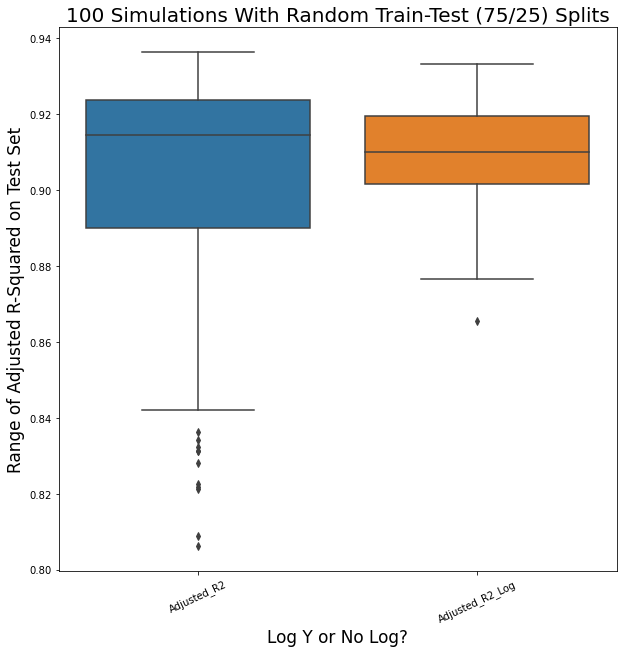

In [15]:
plt.figure(figsize=(10,10))
plt.title('100 Simulations With Random Train-Test (75/25) Splits', fontsize=20)
plt.ylabel('Range of Adjusted R-Squared on Test Set', fontsize=17)
plt.xlabel('Log Y or No Log?', fontsize=17)
sns.boxplot(data=box)
plt.xticks(rotation=25);

In [16]:
box.describe()

Adjusted_R2  Adjusted_R2_Log
count   100.000000       100.000000
mean      0.900156         0.909128
std       0.034527         0.013598
min       0.806158         0.865578
25%       0.889970         0.901529
50%       0.914509         0.909974
75%       0.923757         0.919366
max       0.936306         0.933259

In [17]:
box2 = pd.concat([combo['Mean Absolute Error'], combo_log['MAE USD']], axis=1)
box2

Mean Absolute Error       MAE USD
0          13581.668359  12945.951746
1          14057.922590  14471.463461
2          14110.696974  13881.390340
3          14007.002915  13366.430429
4          14557.101187  13601.742185
5          13797.549560  14213.123363
6          13002.116999  12911.984944
7          14743.609726  13894.750309
8          14361.665729  13882.340638
9          14069.179418  13686.156953
10         12820.682884  12466.335623
11         13630.157389  12946.578671
12         12594.846774  12598.660365
13         13738.175950  13649.167613
14         13785.584748  13711.611959
15         14329.052830  14143.725893
16         14972.815501  14235.615935
17         12628.507758  12413.068000
18         12920.040950  12201.805114
19         13662.428664  13663.895269
20         12711.054779  12645.848607
21         14240.542660  13804.634192
22         13884.547057  13671.442739
23         14743.198109  14095.942134
24         13717.064022  13732.305229
25         13289.545814  12927.546904
26         13625.906163  13864.086498
27         15020.924869  14049.301959
28         13073.114845  13422.177431
29         15448.693175  14739.322589
30         13381.365058  13555.994365
31         13227.506502  13155.002957
32         14034.474411  13825.733300
33         14097.341006  14132.181809
34         12830.332646  13346.049167
35         14031.830280  13767.538702
36         14013.294673  13906.253956
37         13821.801987  14119.703561
38         13060.177936  12650.079283
39         14064.428154  14056.412935
40         14555.105334  13733.253063
41         12821.021285  12491.205616
42         13419.510848  13658.981113
43         13970.952513  13849.992721
44         14435.113348  14775.109984
45         13420.142693  14154.556880
46         14546.191173  13661.432269
47         14741.401562  14783.856401
48         13604.724481  13282.525339
49         14374.581590  13730.333564
50         13908.409716  13438.616647
51         13558.196831  13311.299330
52         14685.982973  14085.594821
53         13785.898835  13493.396411
54         13475.557959  13630.844409
55         13706.872463  14124.604121
56         13309.622471  13564.195427
57         14643.002768  14657.568417
58         14425.408342  13824.206417
59         13358.534358  13639.045437
60         13906.665192  13337.669723
61         12543.380233  12560.680367
62         13225.919617  13014.110582
63         13846.127422  14095.632695
64         13525.387714  13448.742098
65         14238.703217  14056.461631
66         14745.606397  13979.712200
67         13792.600126  13808.322454
68         13780.762344  13665.974699
69         13185.450208  13512.181692
70         14716.193706  14532.459736
71         13677.315436  13161.599802
72         13127.856508  14079.879328
73         15002.481308  14415.969461
74         13255.515185  13846.984432
75         13273.939054  13104.784589
76         13490.354636  13635.817357
77         12178.637434  12472.409236
78         14168.046590  13868.214269
79         14184.045734  13640.178295
80         13491.334434  13004.523127
81         13374.362783  13055.419685
82         13398.553514  13025.149231
83         14309.266921  14280.327554
84         13427.110494  12918.346575
85         13562.602149  13686.088206
86         14402.875609  13601.321120
87         14543.288057  13724.132711
88         14254.066169  14571.021988
89         13295.373152  13798.034743
90         13828.133324  12935.466528
91         13639.205443  13581.699865
92         14752.829258  14561.221359
93         12717.787435  12580.327204
94         13594.434246  13549.617077
95         13169.739789  12698.498829
96         14273.736046  13776.841088
97         14293.840761  14384.550398
98         14910.920141  14244.681671
99         14186.194379  14358.725409

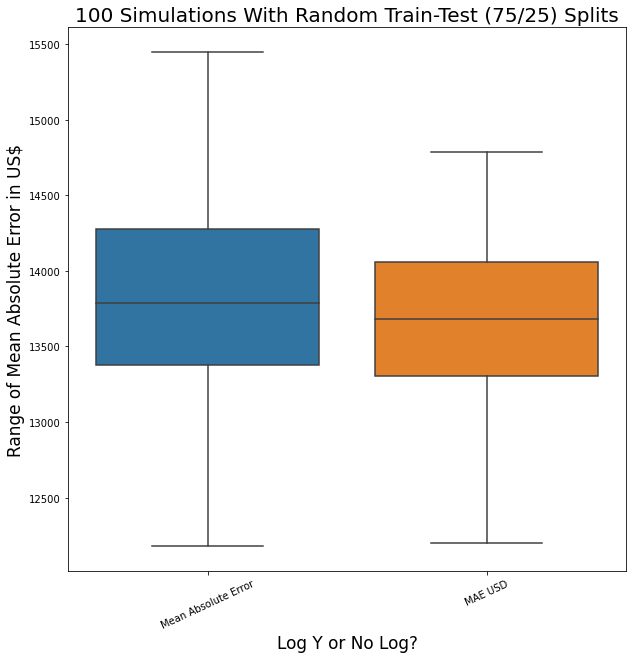

In [18]:
plt.figure(figsize=(10,10))
plt.title('100 Simulations With Random Train-Test (75/25) Splits', fontsize=20)
plt.ylabel('Range of Mean Absolute Error in US$', fontsize=17)
plt.xlabel('Log Y or No Log?', fontsize=17)
sns.boxplot(data=box2)
plt.xticks(rotation=25);

In [19]:
box2.describe()

Mean Absolute Error       MAE USD
count           100.000000    100.000000
mean          13817.248248  13628.177545
std             648.400363    588.771970
min           12178.637434  12201.805114
25%           13379.614489  13304.105832
50%           13789.249481  13678.765472
75%           14278.762225  14056.425109
max           15448.693175  14783.856401